In [ ]:
  from google.colab import files
uploaded = files.upload()  # This will prompt you to select your files from your local machine

Saving gnbsimwith1Ue.log to gnbsimwith1Ue.log


In [ ]:
import re
import json
import pandas as pd

# List to store parsed metric records
metrics_list = []

# -- PARSE THE LOG --
with open('gnbsimwith1Ue.log', 'r') as file:
    for line in file:
        if '"category": "Stats"' in line:
            parts = line.strip().split("\t")
            if len(parts) >= 5:
                timestamp, level, source, message, json_part = parts[:5]
                try:
                    metadata = json.loads(json_part)
                except Exception as e:
                    metadata = {}
                    print(f"Error parsing JSON: {e} in line: {line}")

                if message.startswith("UE:"):
                    # Remove "UE:" prefix and trim
                    message_data = message[3:].strip()
                    # Split on commas
                    fields = [f.strip() for f in message_data.split(",")]

                    # First field is IMSI
                    imsi_field = fields[0]
                    imsi = imsi_field  # e.g. "imsi-208930100007500"

                    # Extract key-value pairs from the rest
                    metrics = {}
                    for f in fields[1:]:
                        if ":" in f:
                            key, val = f.split(":", 1)
                            metrics[key.strip()] = val.strip()

                    # Build a record
                    record = {
                        "timestamp": timestamp,
                        "level": level,
                        "source": source,
                        "imsi": imsi,
                    }
                    # Merge in the metrics from the message
                    record.update(metrics)
                    # Merge in the JSON metadata from the log
                    record.update(metadata)

                    metrics_list.append(record)

# -- CREATE A DATAFRAME FROM THE PARSED RECORDS --
df = pd.DataFrame(metrics_list)

# Make sure the columns exist and convert them to numeric where appropriate
# (since they might be strings initially)
time_cols = [
    'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
    'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
    'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
    'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
    'TotalDeregistrationTime[us]', 'DregReqAccTime[us]'
]
for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# -- GROUP THE DATAFRAME --
df_grouped = df.groupby(['imsi', 'timestamp'], as_index=False).agg({
    'TotalRegTime[us]': 'first',
    'RegReqAuthReq[us]': 'first',
    'AuthRspSecMReq[us]': 'first',
    'SecModeRspICReq[us]': 'first',
    'TotalPduEstTime[us]': 'first',
    'PduSessReqAccept[us]': 'first',
    'TotalCtxReleaseTime[us]': 'first',
    'CtxRelReqCmdTime[us]': 'first',
    'TotalServiceReqTime[us]': 'first',
    'ServReqAccTime[us]': 'first',
    'TotalDeregistrationTime[us]': 'first',
    'DregReqAccTime[us]': 'first'
})

# -- ITERATE OVER GROUPED ROWS AND PRINT --
for idx, row in df_grouped.iterrows():
    print(f"IMSI: {row['imsi']}")
    print(f"  Timestamp: {row['timestamp']}")
    print("  Registration Metrics:")
    print(f"    TotalRegTime[us]: {row['TotalRegTime[us]']}")
    print(f"    RegReqAuthReq[us]: {row['RegReqAuthReq[us]']}")
    print(f"    AuthRspSecMReq[us]: {row['AuthRspSecMReq[us]']}")
    print(f"    SecModeRspICReq[us]: {row['SecModeRspICReq[us]']}")

    if pd.notnull(row['TotalPduEstTime[us]']):
        print("  PDU Establishment Metrics:")
        print(f"    TotalPduEstTime[us]: {row['TotalPduEstTime[us]']}")
        print(f"    PduSessReqAccept[us]: {row['PduSessReqAccept[us]']}")

    if pd.notnull(row['TotalCtxReleaseTime[us]']):
        print("  Context Release Metrics:")
        print(f"    TotalCtxReleaseTime[us]: {row['TotalCtxReleaseTime[us]']}")
        print(f"    CtxRelReqCmdTime[us]: {row['CtxRelReqCmdTime[us]']}")

    if pd.notnull(row['TotalServiceReqTime[us]']):
        print("  Service Request Metrics:")
        print(f"    TotalServiceReqTime[us]: {row['TotalServiceReqTime[us]']}")
        print(f"    ServReqAccTime[us]: {row['ServReqAccTime[us]']}")

    if pd.notnull(row['TotalDeregistrationTime[us]']):
        print("  Deregistration Metrics:")
        print(f"    TotalDeregistrationTime[us]: {row['TotalDeregistrationTime[us]']}")
        print(f"    DregReqAccTime[us]: {row['DregReqAccTime[us]']}")

    print("-" * 50)


IMSI: imsi-208930100007500
  Timestamp: 2025-03-17T20:42:41.734Z
  Registration Metrics:
    TotalRegTime[us]: 865291.0
    RegReqAuthReq[us]: 401707.0
    AuthRspSecMReq[us]: 142051.0
    SecModeRspICReq[us]: 321533.0
--------------------------------------------------
IMSI: imsi-208930100007560
  Timestamp: 2025-03-17T20:42:41.734Z
  Registration Metrics:
    TotalRegTime[us]: 341263.0
    RegReqAuthReq[us]: 243865.0
    AuthRspSecMReq[us]: 31452.0
    SecModeRspICReq[us]: 65946.0
  PDU Establishment Metrics:
    TotalPduEstTime[us]: 757124.0
    PduSessReqAccept[us]: 757124.0
--------------------------------------------------
IMSI: imsi-208930100007620
  Timestamp: 2025-03-17T20:42:41.734Z
  Registration Metrics:
    TotalRegTime[us]: 116763.0
    RegReqAuthReq[us]: 40717.0
    AuthRspSecMReq[us]: 23753.0
    SecModeRspICReq[us]: 52293.0
  PDU Establishment Metrics:
    TotalPduEstTime[us]: 390259.0
    PduSessReqAccept[us]: 390259.0
  Context Release Metrics:
    TotalCtxReleaseTime

In [ ]:
import re
import json
import pandas as pd

# List to store parsed metric records
metrics_list = []

# Open and parse the log file (adjust the file name as needed)
with open('gnbsimwith1Ue.log', 'r') as file:
    for line in file:
        # Only process lines that have the "Stats" category
        if '"category": "Stats"' in line:
            # Split the line by tabs (fields are typically tab-separated)
            parts = line.strip().split("\t")
            if len(parts) >= 5:
                timestamp, level, source, message, json_part = parts[:5]
                # Parse the JSON metadata at the end
                try:
                    metadata = json.loads(json_part)
                except Exception as e:
                    metadata = {}
                    print(f"Error parsing JSON: {e} in line: {line}")

                # Process only lines that start with "UE:"
                if message.startswith("UE:"):
                    # Remove the "UE:" prefix and trim
                    message_data = message[3:].strip()
                    # Split the message on commas to separate fields
                    fields = [f.strip() for f in message_data.split(",")]

                    # The first field is expected to be the IMSI, e.g. "imsi-208930100007500"
                    imsi_field = fields[0]
                    imsi = imsi_field  # if it starts with "imsi-" it should be the complete value

                    # For the remaining fields, extract key and value (split on colon)
                    metrics = {}
                    for f in fields[1:]:
                        if ":" in f:
                            key, val = f.split(":", 1)
                            metrics[key.strip()] = val.strip()

                    # Build a record (dictionary) for this line
                    record = {
                        "timestamp": timestamp,
                        "level": level,
                        "source": source,
                        "imsi": imsi,
                    }
                    # Merge in the metrics from the message
                    record.update(metrics)
                    # Also include any metadata from the JSON payload
                    record.update(metadata)

                    metrics_list.append(record)

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(metrics_list)



In [ ]:
for idx, row in df_grouped.iterrows():
    print(f"IMSI: {row['imsi']}")
    print(f"  Timestamp: {row['timestamp']}")
    print("  Registration Metrics:")
    print(f"    TotalRegTime[us]: {row['TotalRegTime[us]']}")
    print(f"    RegReqAuthReq[us]: {row['RegReqAuthReq[us]']}")
    print(f"    AuthRspSecMReq[us]: {row['AuthRspSecMReq[us]']}")
    print(f"    SecModeRspICReq[us]: {row['SecModeRspICReq[us]']}")

    if pd.notnull(row['TotalPduEstTime[us]']):
        print("  PDU Establishment Metrics:")
        print(f"    TotalPduEstTime[us]: {row['TotalPduEstTime[us]']}")
        print(f"    PduSessReqAccept[us]: {row['PduSessReqAccept[us]']}")

    if pd.notnull(row['TotalCtxReleaseTime[us]']):
        print("  Context Release Metrics:")
        print(f"    TotalCtxReleaseTime[us]: {row['TotalCtxReleaseTime[us]']}")
        print(f"    CtxRelReqCmdTime[us]: {row['CtxRelReqCmdTime[us]']}")

    if pd.notnull(row['TotalServiceReqTime[us]']):
        print("  Service Request Metrics:")
        print(f"    TotalServiceReqTime[us]: {row['TotalServiceReqTime[us]']}")
        print(f"    ServReqAccTime[us]: {row['ServReqAccTime[us]']}")

    if pd.notnull(row['TotalDeregistrationTime[us]']):
        print("  Deregistration Metrics:")
        print(f"    TotalDeregistrationTime[us]: {row['TotalDeregistrationTime[us]']}")
        print(f"    DregReqAccTime[us]: {row['DregReqAccTime[us]']}")

    print("-" * 50)


IMSI: imsi-208930100007500
  Timestamp: 2025-03-17T20:42:41.734Z
  Registration Metrics:
    TotalRegTime[us]: 865291.0
    RegReqAuthReq[us]: 401707.0
    AuthRspSecMReq[us]: 142051.0
    SecModeRspICReq[us]: 321533.0
--------------------------------------------------
IMSI: imsi-208930100007560
  Timestamp: 2025-03-17T20:42:41.734Z
  Registration Metrics:
    TotalRegTime[us]: 341263.0
    RegReqAuthReq[us]: 243865.0
    AuthRspSecMReq[us]: 31452.0
    SecModeRspICReq[us]: 65946.0
  PDU Establishment Metrics:
    TotalPduEstTime[us]: 757124.0
    PduSessReqAccept[us]: 757124.0
--------------------------------------------------
IMSI: imsi-208930100007620
  Timestamp: 2025-03-17T20:42:41.734Z
  Registration Metrics:
    TotalRegTime[us]: 116763.0
    RegReqAuthReq[us]: 40717.0
    AuthRspSecMReq[us]: 23753.0
    SecModeRspICReq[us]: 52293.0
  PDU Establishment Metrics:
    TotalPduEstTime[us]: 390259.0
    PduSessReqAccept[us]: 390259.0
  Context Release Metrics:
    TotalCtxReleaseTime

In [ ]:
import re
import json
import pandas as pd
from tabulate import tabulate

# -----------------------------------------------------------------------------
# STEP 1: Parse the log file and create the raw DataFrame (df).
# -----------------------------------------------------------------------------
def parse_log_to_df(log_filename):
    """Parses the log file to create a raw DataFrame of metrics."""
    metrics_list = []

    with open(log_filename, 'r') as file:
        for line in file:
            # Only process lines that have the "Stats" category
            if '"category": "Stats"' in line:
                parts = line.strip().split("\t")
                if len(parts) >= 5:
                    timestamp, level, source, message, json_part = parts[:5]

                    # Attempt to parse the JSON part
                    try:
                        metadata = json.loads(json_part)
                    except Exception as e:
                        metadata = {}
                        print(f"Error parsing JSON: {e} in line: {line}")

                    # We're only interested in lines starting with "UE:"
                    if message.startswith("UE:"):
                        # Remove the "UE:" prefix and trim
                        message_data = message[3:].strip()
                        # Split the message into fields by commas
                        fields = [f.strip() for f in message_data.split(",")]

                        # First field is the IMSI (e.g., "imsi-208930100007500")
                        imsi_field = fields[0]
                        imsi = imsi_field

                        # The remaining fields are key:value pairs
                        metrics = {}
                        for f in fields[1:]:
                            if ":" in f:
                                key, val = f.split(":", 1)
                                metrics[key.strip()] = val.strip()

                        # Build a record (dictionary)
                        record = {
                            "timestamp": timestamp,
                            "level": level,
                            "source": source,
                            "imsi": imsi,
                        }
                        # Merge in metrics from the message
                        record.update(metrics)
                        # Merge in the JSON metadata from the log
                        record.update(metadata)

                        metrics_list.append(record)

    # Create a DataFrame
    df_raw = pd.DataFrame(metrics_list)

    # Convert timing columns from string to numeric (coerce errors to NaN)
    time_cols = [
        'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
        'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
        'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
        'TotalDeregistrationTime[us]', 'DregReqAccTime[us]'
    ]
    for col in time_cols:
        if col in df_raw.columns:
            df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    return df_raw

# -----------------------------------------------------------------------------
# STEP 2: Aggregate DataFrame (df) into df_combined.
#         We assume one row per IMSI, taking the "first" non-null occurrence
#         of each metric. Adjust as needed for your scenario.
# -----------------------------------------------------------------------------
def aggregate_df(df_raw):
    """
    Creates df_combined from df_raw, ensuring each IMSI appears once
    with relevant metrics (like first non-null if multiple appear).
    """
    # You can also group by ['imsi', 'timestamp'] if you want multiple rows per IMSI/timestamp.
    df_combined = df_raw.groupby('imsi', as_index=False).agg({
        'TotalRegTime[us]': 'first',
        'RegReqAuthReq[us]': 'first',
        'AuthRspSecMReq[us]': 'first',
        'SecModeRspICReq[us]': 'first',
        'TotalPduEstTime[us]': 'first',
        'PduSessReqAccept[us]': 'first',
        'TotalCtxReleaseTime[us]': 'first',
        'CtxRelReqCmdTime[us]': 'first',
        'TotalServiceReqTime[us]': 'first',
        'ServReqAccTime[us]': 'first',
        'TotalDeregistrationTime[us]': 'first',
        'DregReqAccTime[us]': 'first'
    })
    return df_combined

# -----------------------------------------------------------------------------
# STEP 3: Define groups and reporting function.
# -----------------------------------------------------------------------------

# Compute average in microseconds and seconds
def compute_avg(df, col):
    """
    Returns (avg_us, avg_sec) for a given column col in the DataFrame.
    """
    if len(df) == 0 or col not in df.columns:
        return (float('nan'), float('nan'))

    avg_us = df[col].mean()
    avg_sec = avg_us / 1e6 if pd.notna(avg_us) else float('nan')
    return avg_us, avg_sec

def report_group(group_df, group_name, metrics, overall_metric, phase_name):
    """
    Prints a summary for a group of UEs, including average times for each
    relevant metric in microseconds and seconds.
    """
    count = len(group_df)
    print(f"--- {group_name} ---")
    print(f"UE Count: {count}")

    # Report each metric's average
    for col in metrics:
        avg_us, avg_sec = compute_avg(group_df, col)
        if pd.notna(avg_us):
            print(f"  Average {col}: {avg_us:.2f} microseconds, {avg_sec:.6f} seconds")
        else:
            print(f"  Average {col}: No data available")

    # If the overall metric isn't in metrics, print it separately.
    if overall_metric not in metrics:
        overall_avg_us, overall_avg_sec = compute_avg(group_df, overall_metric)
        if pd.notna(overall_avg_us):
            print(f"  Overall {phase_name} Average ({overall_metric}): "
                  f"{overall_avg_us:.2f} microseconds, {overall_avg_sec:.6f} seconds")
        else:
            print(f"  Overall {phase_name} Average ({overall_metric}): No data available")

    print("\n")

# -----------------------------------------------------------------------------
# STEP 4: Bring it all together in a main section.
# -----------------------------------------------------------------------------
if __name__ == "__main__":
    # 1) Parse raw log into df
    df = parse_log_to_df("gnbsimwith1Ue.log")

    # 2) Aggregate into df_combined
    df_combined = aggregate_df(df)

    # 3) Define groups based on which phase columns are NaN vs. not NaN
    group_reg_only = df_combined[df_combined['TotalPduEstTime[us]'].isna()]
    group_reg_and_pdu = df_combined[df_combined['TotalPduEstTime[us]'].notna()]
    group_ctx_release = df_combined[df_combined['TotalCtxReleaseTime[us]'].notna()]
    group_service_req = df_combined[df_combined['TotalServiceReqTime[us]'].notna()]
    group_dereg = df_combined[df_combined['TotalDeregistrationTime[us]'].notna()]

    # 4) Report on each group

    # Group 1: Registration Only
    # The four key registration metrics + total reg time as overall
    reg_metrics = ['TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]', 'SecModeRspICReq[us]']
    report_group(group_reg_only, "Group 1: Registration Only", reg_metrics, "TotalRegTime[us]", "Registration")

    # Group 2: Registration and PDU Session
    # Combined metrics for Registration + PDU
    pdu_metrics = ['TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]', 'SecModeRspICReq[us]',
                   'TotalPduEstTime[us]', 'PduSessReqAccept[us]']
    report_group(group_reg_and_pdu, "Group 2: Registration + PDU Session", pdu_metrics, "TotalPduEstTime[us]", "PDU Session")

    # Group 3: Context Release
    ctx_metrics = ['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]']
    report_group(group_ctx_release, "Group 3: Context Release", ctx_metrics, "TotalCtxReleaseTime[us]", "Context Release")

    # Group 4: Service Request
    service_metrics = ['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalServiceReqTime[us]', 'ServReqAccTime[us]']
    report_group(group_service_req, "Group 4: Service Request", service_metrics, "TotalServiceReqTime[us]", "Service Request")

    # Group 5: Deregistration
    dereg_metrics = ['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalDeregistrationTime[us]', 'DregReqAccTime[us]']
    report_group(group_dereg, "Group 5: Deregistration", dereg_metrics, "TotalDeregistrationTime[us]", "Deregistration")

    # 5) Finally, print the full aggregated DataFrame
    print("Full Aggregated DataFrame (df_combined):")
    print(tabulate(df_combined, headers='keys', tablefmt='grid'))


--- Group 1: Registration Only ---
UE Count: 1
  Average TotalRegTime[us]: 865291.00 microseconds, 0.865291 seconds
  Average RegReqAuthReq[us]: 401707.00 microseconds, 0.401707 seconds
  Average AuthRspSecMReq[us]: 142051.00 microseconds, 0.142051 seconds
  Average SecModeRspICReq[us]: 321533.00 microseconds, 0.321533 seconds


--- Group 2: Registration + PDU Session ---
UE Count: 5
  Average TotalRegTime[us]: 286130.40 microseconds, 0.286130 seconds
  Average RegReqAuthReq[us]: 203080.00 microseconds, 0.203080 seconds
  Average AuthRspSecMReq[us]: 28733.20 microseconds, 0.028733 seconds
  Average SecModeRspICReq[us]: 54317.20 microseconds, 0.054317 seconds
  Average TotalPduEstTime[us]: 464565.60 microseconds, 0.464566 seconds
  Average PduSessReqAccept[us]: 464565.60 microseconds, 0.464566 seconds


--- Group 3: Context Release ---
UE Count: 2
  Average TotalRegTime[us]: 216111.00 microseconds, 0.216111 seconds
  Average TotalPduEstTime[us]: 395781.50 microseconds, 0.395782 seconds


In [ ]:
import pandas as pd

# -----------------------------------------------------------------------------
# ASSUMPTION:
#   df_combined is your aggregated DataFrame (one row per UE) where:
#     - 'TotalRegTime[us]' contains the registration time.
#     - 'TotalPduEstTime[us]' contains the PDU session establishment time.
#     - 'TotalCtxReleaseTime[us]' contains the context release time.
#     - 'TotalServiceReqTime[us]' contains the service request time.
#     - 'TotalDeregistrationTime[us]' contains the deregistration time.
#   If a UE did not perform a phase, the corresponding column is NaN.
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# Helper Function: Compute average (in microseconds and seconds) for a given column.
# -----------------------------------------------------------------------------
def compute_avg(df, col):
    avg_us = df[col].mean()  # Compute average in microseconds
    avg_sec = avg_us / 1e6 if pd.notna(avg_us) else None  # Convert to seconds
    return avg_us, avg_sec

# -----------------------------------------------------------------------------
# PROCEDURE 1: Registration
#
# All UEs should have registration times, so we simply use the TotalRegTime[us] column.
# -----------------------------------------------------------------------------
reg_df = df_combined[df_combined['TotalRegTime[us]'].notna()]
reg_count = len(reg_df)
avg_reg_us, avg_reg_sec = compute_avg(reg_df, 'TotalRegTime[us]')

print("=== Registration Phase ===")
print(f"UE Count (Registration): {reg_count}")
print(f"Average Registration Time (TotalRegTime[us]): {avg_reg_us:.2f} microseconds, {avg_reg_sec:.6f} seconds")
print("\n")

# -----------------------------------------------------------------------------
# PROCEDURE 2: PDU Session Establishment
#
# Only a subset of UEs perform the PDU session phase. We use TotalPduEstTime[us]
# as the primary metric for PDU session establishment.
# -----------------------------------------------------------------------------
pdu_df = df_combined[df_combined['TotalPduEstTime[us]'].notna()]
pdu_count = len(pdu_df)
avg_pdu_us, avg_pdu_sec = compute_avg(pdu_df, 'TotalPduEstTime[us]')

print("=== PDU Session Establishment Phase ===")
print(f"UE Count (PDU Session): {pdu_count}")
print(f"Average PDU Establishment Time (TotalPduEstTime[us]): {avg_pdu_us:.2f} microseconds, {avg_pdu_sec:.6f} seconds")
print("\n")

# -----------------------------------------------------------------------------
# PROCEDURE 3: Context Release
#
# Only UEs that reached the context release phase have this metric.
# We use TotalCtxReleaseTime[us] as the primary metric.
# -----------------------------------------------------------------------------
ctx_df = df_combined[df_combined['TotalCtxReleaseTime[us]'].notna()]
ctx_count = len(ctx_df)
avg_ctx_us, avg_ctx_sec = compute_avg(ctx_df, 'TotalCtxReleaseTime[us]')

print("=== Context Release Phase ===")
print(f"UE Count (Context Release): {ctx_count}")
print(f"Average Context Release Time (TotalCtxReleaseTime[us]): {avg_ctx_us:.2f} microseconds, {avg_ctx_sec:.6f} seconds")
print("\n")

# -----------------------------------------------------------------------------
# PROCEDURE 4: Service Request
#
# For UEs that initiated a service request, we use TotalServiceReqTime[us] as the primary metric.
# -----------------------------------------------------------------------------
service_df = df_combined[df_combined['TotalServiceReqTime[us]'].notna()]
service_count = len(service_df)
avg_service_us, avg_service_sec = compute_avg(service_df, 'TotalServiceReqTime[us]')

print("=== Service Request Phase ===")
print(f"UE Count (Service Request): {service_count}")
print(f"Average Service Request Time (TotalServiceReqTime[us]): {avg_service_us:.2f} microseconds, {avg_service_sec:.6f} seconds")
print("\n")

# -----------------------------------------------------------------------------
# PROCEDURE 5: Deregistration
#
# For UEs that completed deregistration, we use TotalDeregistrationTime[us] as the primary metric.
# -----------------------------------------------------------------------------
dereg_df = df_combined[df_combined['TotalDeregistrationTime[us]'].notna()]
dereg_count = len(dereg_df)
avg_dereg_us, avg_dereg_sec = compute_avg(dereg_df, 'TotalDeregistrationTime[us]')

print("=== Deregistration Phase ===")
print(f"UE Count (Deregistration): {dereg_count}")
print(f"Average Deregistration Time (TotalDeregistrationTime[us]): {avg_dereg_us:.2f} microseconds, {avg_dereg_sec:.6f} seconds")
print("\n")


=== Registration Phase ===
UE Count (Registration): 6
Average Registration Time (TotalRegTime[us]): 382657.17 microseconds, 0.382657 seconds


=== PDU Session Establishment Phase ===
UE Count (PDU Session): 5
Average PDU Establishment Time (TotalPduEstTime[us]): 464565.60 microseconds, 0.464566 seconds


=== Context Release Phase ===
UE Count (Context Release): 2
Average Context Release Time (TotalCtxReleaseTime[us]): 68145.50 microseconds, 0.068145 seconds


=== Service Request Phase ===
UE Count (Service Request): 1
Average Service Request Time (TotalServiceReqTime[us]): 252003.00 microseconds, 0.252003 seconds


=== Deregistration Phase ===
UE Count (Deregistration): 1
Average Deregistration Time (TotalDeregistrationTime[us]): 97381.00 microseconds, 0.097381 seconds




In [ ]:
import pandas as pd
from tabulate import tabulate

# -----------------------------------------------------------------------------
# ASSUMPTION:
#   df_combined is your aggregated DataFrame where each row represents one UE.
#   The following columns hold the timing metrics (in microseconds) for different phases:
#       - TotalRegTime[us], RegReqAuthReq[us], AuthRspSecMReq[us], SecModeRspICReq[us]
#       - TotalPduEstTime[us], PduSessReqAccept[us]
#       - TotalCtxReleaseTime[us], CtxRelReqCmdTime[us]
#       - TotalServiceReqTime[us], ServReqAccTime[us]
#       - TotalDeregistrationTime[us], DregReqAccTime[us]
#   If a UE did not perform a phase, the corresponding column is NaN.
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# GROUP DEFINITIONS:
# -----------------------------------------------------------------------------
# Group 1: UEs that only performed Registration (no PDU session recorded)
group_reg_only = df_combined[df_combined['TotalPduEstTime[us]'].isna()]

# Group 2: UEs that performed Registration and PDU Session establishment
group_reg_and_pdu = df_combined[df_combined['TotalPduEstTime[us]'].notna()]

# Group 3: UEs with Context Release (non-null TotalCtxReleaseTime[us])
group_ctx_release = df_combined[df_combined['TotalCtxReleaseTime[us]'].notna()]

# Group 4: UEs with Service Request (non-null TotalServiceReqTime[us])
group_service_req = df_combined[df_combined['TotalServiceReqTime[us]'].notna()]

# Group 5: UEs with Deregistration (non-null TotalDeregistrationTime[us])
group_dereg = df_combined[df_combined['TotalDeregistrationTime[us]'].notna()]

# -----------------------------------------------------------------------------
# COMPUTE DESCRIPTIVE STATISTICS FOR EACH GROUP:
# -----------------------------------------------------------------------------

# Group 1: Registration Only
reg_only_stats = group_reg_only[['TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]', 'SecModeRspICReq[us]']].describe()
print("Descriptive Statistics for Registration Only Group:")
print(reg_only_stats)
print("\n")

# Group 2: Registration and PDU Session
reg_pdu_stats = group_reg_and_pdu[['TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]', 'SecModeRspICReq[us]',
                                    'TotalPduEstTime[us]', 'PduSessReqAccept[us]']].describe()
print("Descriptive Statistics for Registration + PDU Session Group:")
print(reg_pdu_stats)
print("\n")

# Group 3: UEs with Context Release
ctx_release_stats = group_ctx_release[['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]']].describe()
print("Descriptive Statistics for UEs with Context Release Group:")
print(ctx_release_stats)
print("\n")

# Group 4: UEs with Service Request
service_req_stats = group_service_req[['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalServiceReqTime[us]', 'ServReqAccTime[us]']].describe()
print("Descriptive Statistics for UEs with Service Request Group:")
print(service_req_stats)
print("\n")

# Group 5: UEs with Deregistration
dereg_stats = group_dereg[['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalDeregistrationTime[us]', 'DregReqAccTime[us]']].describe()
print("Descriptive Statistics for UEs with Deregistration Group:")
print(dereg_stats)
print("\n")

# -----------------------------------------------------------------------------
# Optionally, you can also display the results in a table format using tabulate.
# For example, for Group 1:
print("Group 1: Registration Only (Formatted Table)")
print(tabulate(reg_only_stats, headers='keys', tablefmt='grid'))



Descriptive Statistics for Registration Only Group:
       TotalRegTime[us]  RegReqAuthReq[us]  AuthRspSecMReq[us]  \
count               1.0                1.0                 1.0   
mean           865291.0           401707.0            142051.0   
std                 NaN                NaN                 NaN   
min            865291.0           401707.0            142051.0   
25%            865291.0           401707.0            142051.0   
50%            865291.0           401707.0            142051.0   
75%            865291.0           401707.0            142051.0   
max            865291.0           401707.0            142051.0   

       SecModeRspICReq[us]  
count                  1.0  
mean              321533.0  
std                    NaN  
min               321533.0  
25%               321533.0  
50%               321533.0  
75%               321533.0  
max               321533.0  


Descriptive Statistics for Registration + PDU Session Group:
       TotalRegTime[us]  RegR

Plotting Group 1: Registration Only


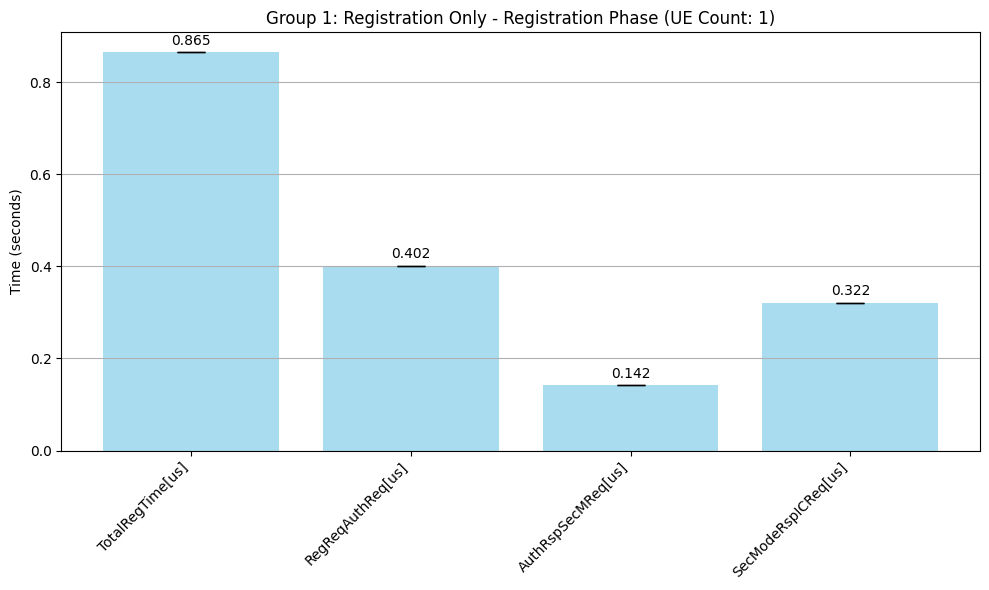

Plotting Group 2: Registration and PDU Session


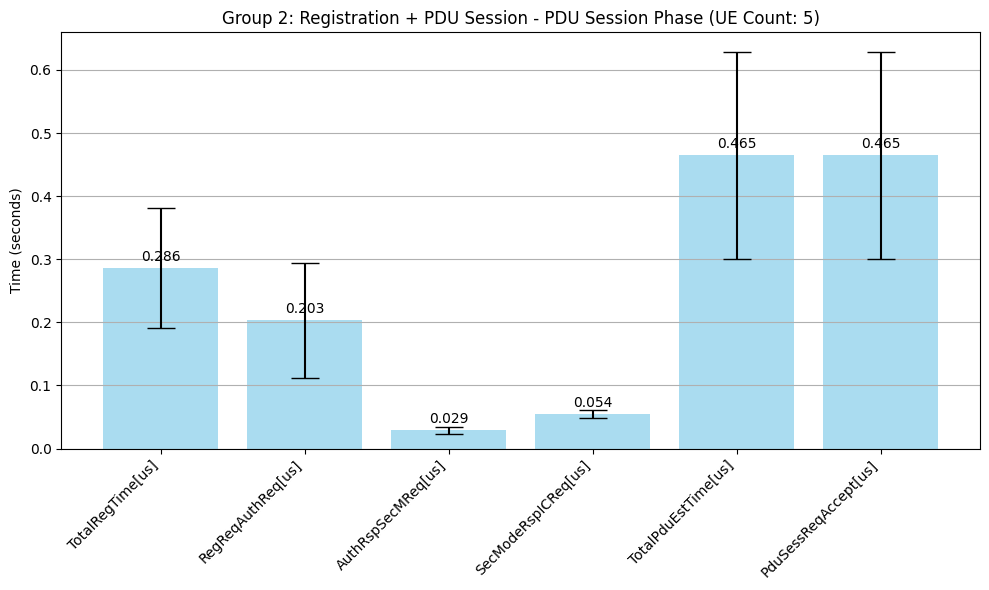

Plotting Group 3: UEs with Context Release


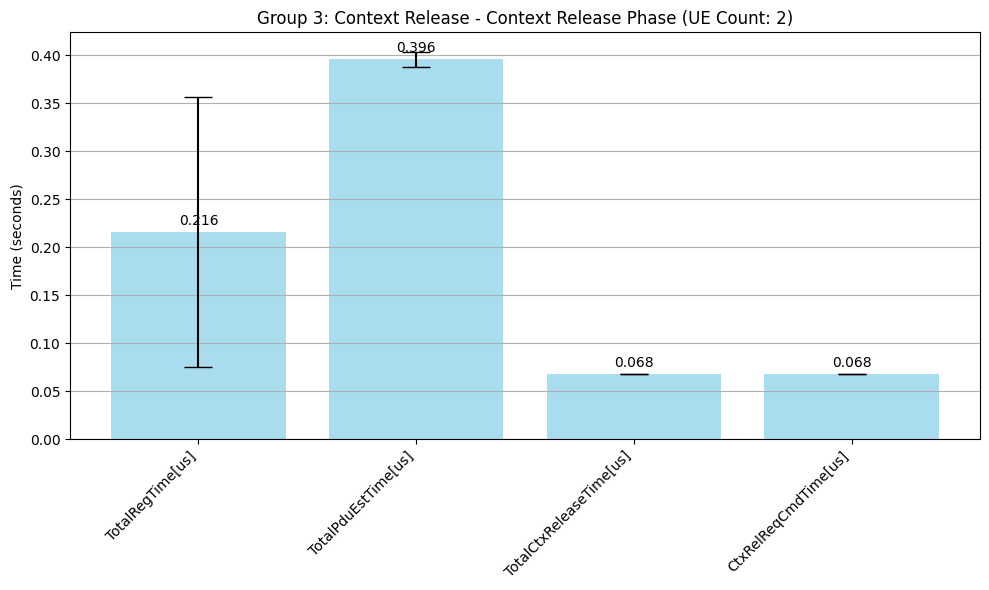

Plotting Group 4: UEs with Service Request


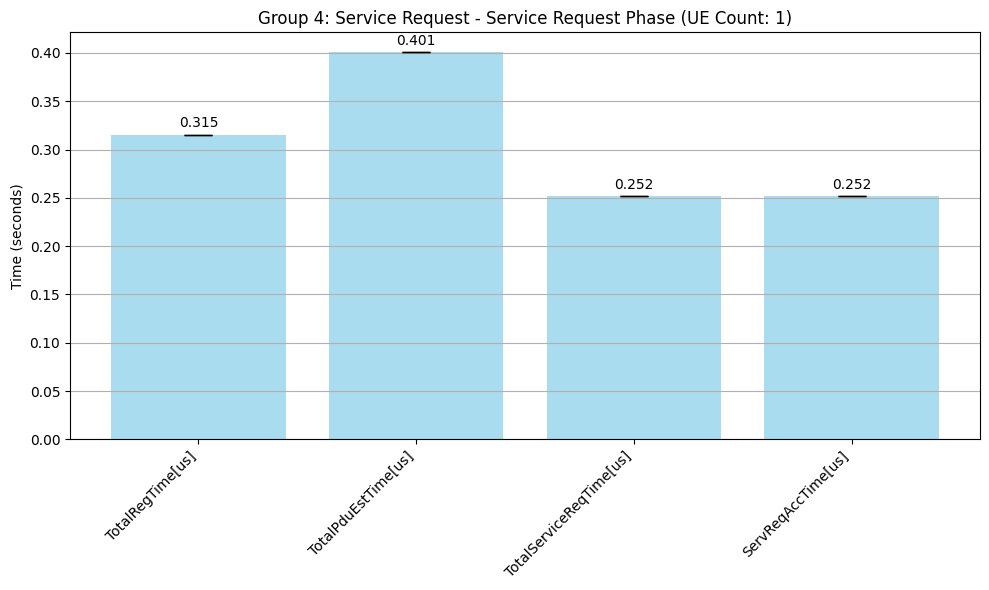

Plotting Group 5: UEs with Deregistration


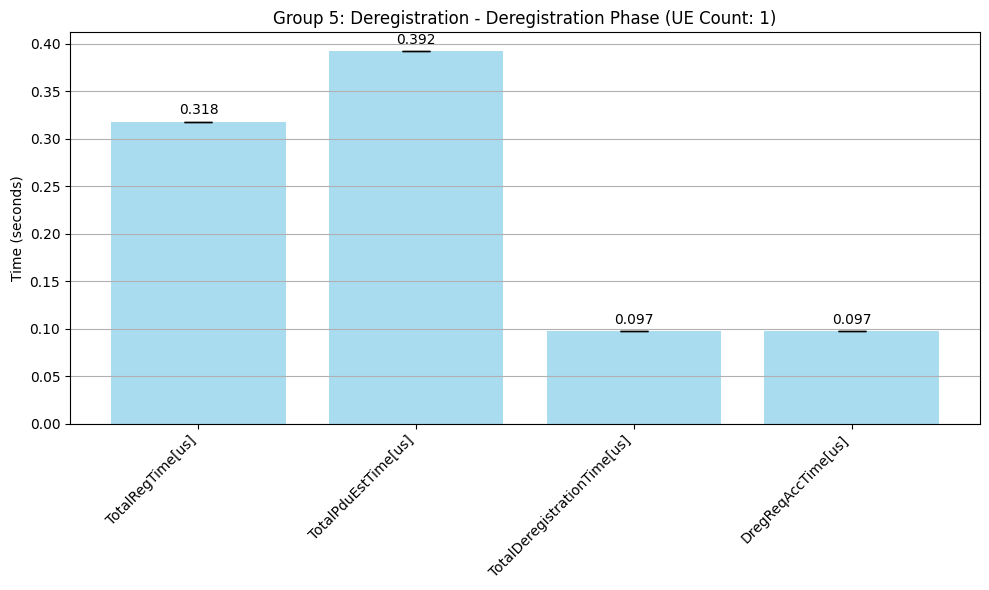

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to plot metrics for a given group.
def plot_group_metrics(group_df, group_name, metrics, phase_title):
    """
    Plots a bar chart for the given metrics of a group.

    Parameters:
      - group_df: DataFrame for the group.
      - group_name: Name of the group (for labeling).
      - metrics: List of metric columns to plot.
      - phase_title: A short title for the phase (used in the plot title).

    The function computes the average and standard deviation (converted to seconds)
    for each metric and then creates a bar chart. The UE count is included in the title.
    """
    count = len(group_df)
    avgs = []
    stds = []

    # Compute averages and standard deviations (convert microseconds to seconds)
    for col in metrics:
        avg_us = group_df[col].mean()
        std_us = group_df[col].std()
        avgs.append(avg_us / 1e6 if pd.notna(avg_us) else 0)
        stds.append(std_us / 1e6 if pd.notna(std_us) else 0)

    # Create positions for bars on x-axis
    x = np.arange(len(metrics))

    # Create the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(x, avgs, yerr=stds, align='center', alpha=0.7, ecolor='black', capsize=10, color='skyblue')

    # Set labels and title. The title includes the group name, phase, and UE count.
    ax.set_ylabel('Time (seconds)')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')
    ax.set_title(f"{group_name} - {phase_title} Phase (UE Count: {count})")
    ax.yaxis.grid(True)

    # Annotate each bar with its average value.
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# Group definitions (assuming df_combined is already defined):
# -----------------------------------------------------------------------------
# Group 1: UEs that only performed Registration.
group_reg_only = df_combined[df_combined['TotalPduEstTime[us]'].isna()]

# Group 2: UEs that performed Registration and PDU Session establishment.
group_reg_and_pdu = df_combined[df_combined['TotalPduEstTime[us]'].notna()]

# Group 3: UEs with Context Release metrics.
group_ctx_release = df_combined[df_combined['TotalCtxReleaseTime[us]'].notna()]

# Group 4: UEs with Service Request metrics.
group_service_req = df_combined[df_combined['TotalServiceReqTime[us]'].notna()]

# Group 5: UEs with Deregistration metrics.
group_dereg = df_combined[df_combined['TotalDeregistrationTime[us]'].notna()]

# Define metric lists for each group.
reg_metrics = ['TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]', 'SecModeRspICReq[us]']
pdu_metrics = ['TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]', 'SecModeRspICReq[us]',
               'TotalPduEstTime[us]', 'PduSessReqAccept[us]']
ctx_metrics = ['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]']
service_metrics = ['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalServiceReqTime[us]', 'ServReqAccTime[us]']
dereg_metrics = ['TotalRegTime[us]', 'TotalPduEstTime[us]', 'TotalDeregistrationTime[us]', 'DregReqAccTime[us]']

# -----------------------------------------------------------------------------
# Plot for Each Group with UE Count in the Title:
# -----------------------------------------------------------------------------
print("Plotting Group 1: Registration Only")
plot_group_metrics(group_reg_only, "Group 1: Registration Only", reg_metrics, "Registration")

print("Plotting Group 2: Registration and PDU Session")
plot_group_metrics(group_reg_and_pdu, "Group 2: Registration + PDU Session", pdu_metrics, "PDU Session")

print("Plotting Group 3: UEs with Context Release")
plot_group_metrics(group_ctx_release, "Group 3: Context Release", ctx_metrics, "Context Release")

print("Plotting Group 4: UEs with Service Request")
plot_group_metrics(group_service_req, "Group 4: Service Request", service_metrics, "Service Request")

print("Plotting Group 5: UEs with Deregistration")
plot_group_metrics(group_dereg, "Group 5: Deregistration", dereg_metrics, "Deregistration")


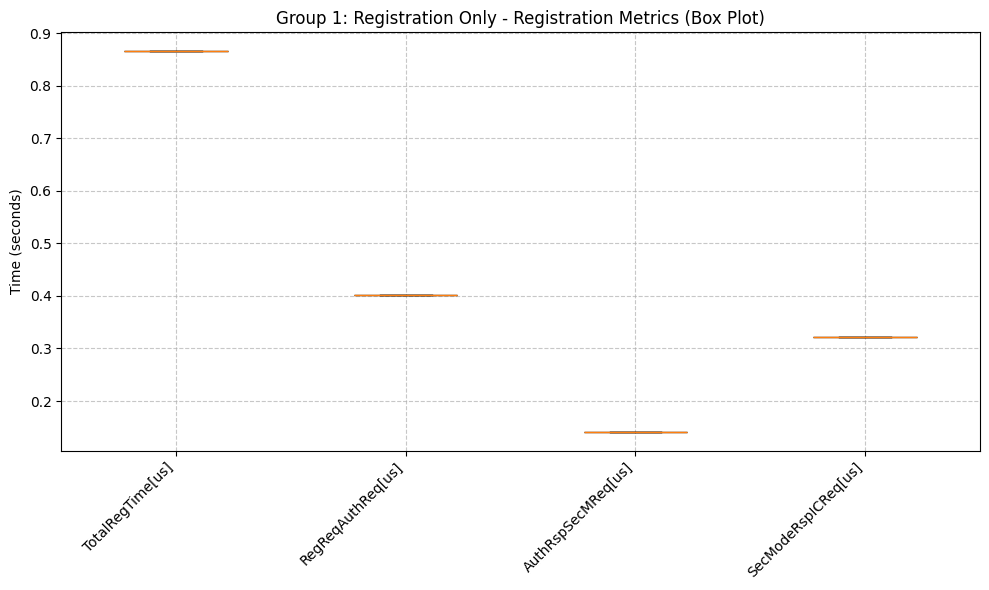

In [ ]:
import matplotlib.pyplot as plt

def plot_box_metrics(df, group_name, metrics, phase_title):
    """
    Creates a box plot for the given list of metrics in the DataFrame.
    """
    # Extract data for only the specified metrics
    data = [df[col].dropna()/1e6 for col in metrics]  # converting microseconds to seconds
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, patch_artist=True)
    plt.xticks(range(1, len(metrics)+1), metrics, rotation=45, ha='right')
    plt.ylabel("Time (seconds)")
    plt.title(f"{group_name} - {phase_title} (Box Plot)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example for Group 1: Registration Only
plot_box_metrics(group_reg_only, "Group 1: Registration Only", reg_metrics, "Registration Metrics")


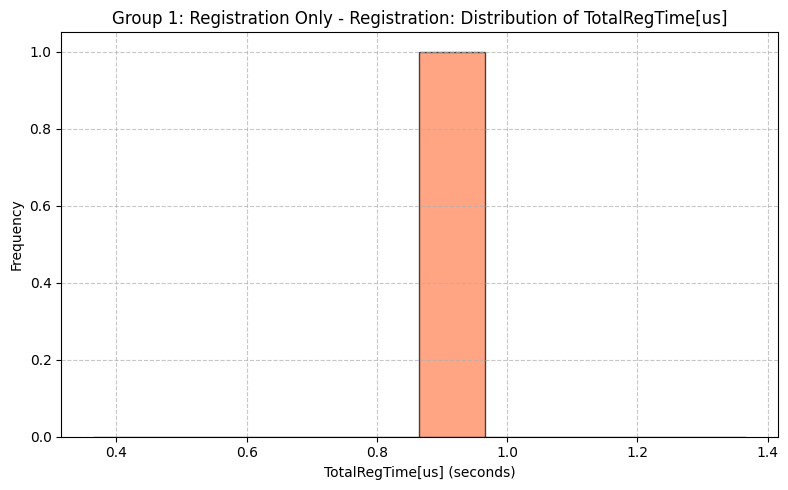

In [ ]:
def plot_histogram(df, metric, group_name, phase_title):
    """
    Plots a histogram for a given metric.
    """
    data = df[metric].dropna()/1e6  # Convert microseconds to seconds
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=10, color='coral', alpha=0.7, edgecolor='black')
    plt.xlabel(f"{metric} (seconds)")
    plt.ylabel("Frequency")
    plt.title(f"{group_name} - {phase_title}: Distribution of {metric}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example: Histogram for TotalRegTime in Group 1
plot_histogram(group_reg_only, 'TotalRegTime[us]', "Group 1: Registration Only", "Registration")


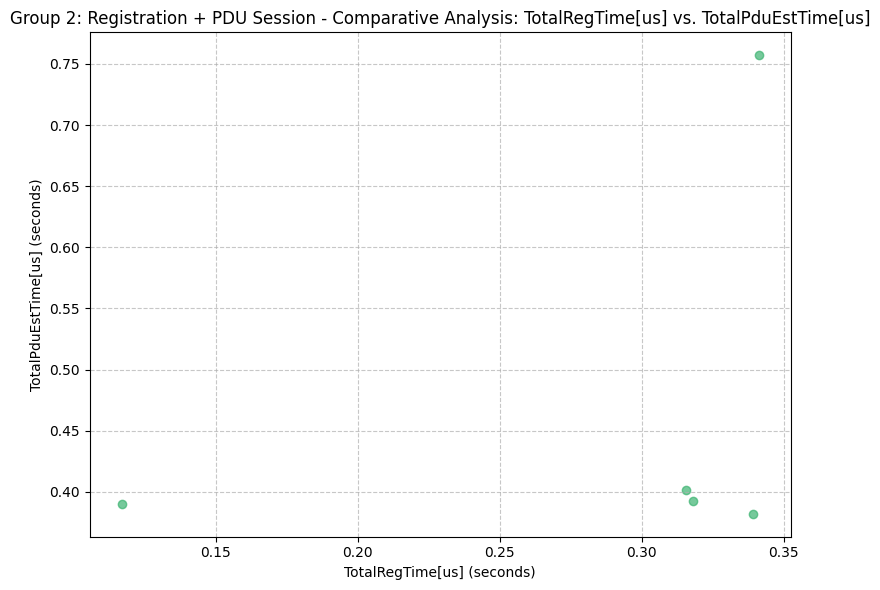

In [ ]:
def plot_scatter(df, x_metric, y_metric, group_name, phase_title):
    """
    Creates a scatter plot comparing two metrics.
    """
    x = df[x_metric].dropna()/1e6  # Convert microseconds to seconds
    y = df[y_metric].dropna()/1e6
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.7, color='mediumseagreen')
    plt.xlabel(f"{x_metric} (seconds)")
    plt.ylabel(f"{y_metric} (seconds)")
    plt.title(f"{group_name} - {phase_title}: {x_metric} vs. {y_metric}")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example: Scatter plot for Group 2 (Registration vs. PDU session)
plot_scatter(group_reg_and_pdu, 'TotalRegTime[us]', 'TotalPduEstTime[us]', "Group 2: Registration + PDU Session", "Comparative Analysis")


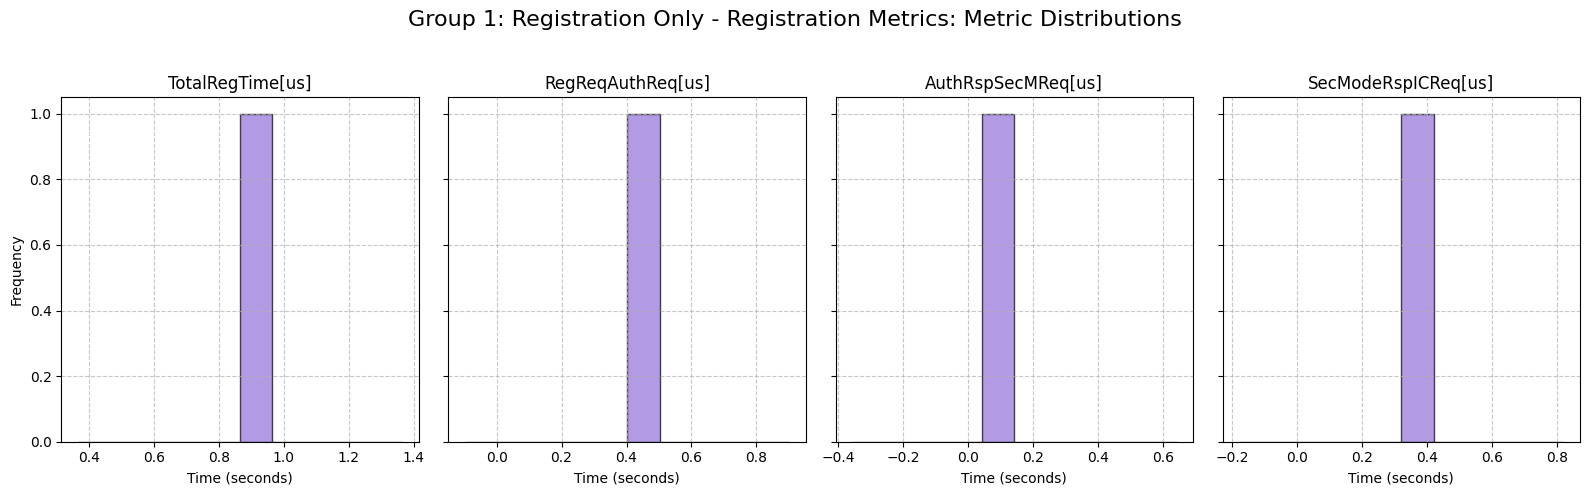

In [ ]:
def plot_multi_panel(df, metrics, group_name, phase_title):
    """
    Creates a multi-panel (subplots) figure for the given metrics.
    """
    n = len(metrics)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 5), sharey=True)
    for i, col in enumerate(metrics):
        data = df[col].dropna()/1e6  # Convert microseconds to seconds
        axes[i].hist(data, bins=10, color='mediumpurple', alpha=0.7, edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel("Time (seconds)")
        axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[0].set_ylabel("Frequency")
    fig.suptitle(f"{group_name} - {phase_title}: Metric Distributions", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example: Multi-panel plot for Group 1 registration metrics
plot_multi_panel(group_reg_only, reg_metrics, "Group 1: Registration Only", "Registration Metrics")



In [ ]:
import re
import json
import pandas as pd
from tabulate import tabulate

###############################################################################
# STEP 1: Parse the log file and build the initial (raw) DataFrame (df).
###############################################################################
def parse_log_to_df(log_filename):
    """
    Reads the log file, filters lines with 'Stats' category and 'UE:' prefix,
    extracts key-value metrics, and returns a raw Pandas DataFrame.
    """
    metrics_list = []

    with open(log_filename, 'r') as file:
        for line in file:
            # Only process lines that have the "Stats" category
            if '"category": "Stats"' in line:
                parts = line.strip().split("\t")
                if len(parts) >= 5:
                    timestamp, level, source, message, json_part = parts[:5]

                    # Attempt to parse JSON metadata
                    try:
                        metadata = json.loads(json_part)
                    except Exception as e:
                        metadata = {}
                        print(f"Error parsing JSON: {e} in line: {line}")

                    # Only lines that start with "UE:"
                    if message.startswith("UE:"):
                        # Remove "UE:" prefix and trim
                        message_data = message[3:].strip()
                        # Split the message into fields by commas
                        fields = [f.strip() for f in message_data.split(",")]

                        # The first field is the IMSI
                        imsi_field = fields[0]
                        imsi = imsi_field

                        # For the remaining fields, split on ':'
                        metrics = {}
                        for f in fields[1:]:
                            if ":" in f:
                                key, val = f.split(":", 1)
                                metrics[key.strip()] = val.strip()

                        # Build a record
                        record = {
                            "timestamp": timestamp,
                            "level": level,
                            "source": source,
                            "imsi": imsi
                        }
                        # Merge in the metrics from the message
                        record.update(metrics)
                        # Also merge in JSON metadata
                        record.update(metadata)

                        metrics_list.append(record)

    # Convert to DataFrame
    df_raw = pd.DataFrame(metrics_list)

    # Convert timing columns from string to numeric
    time_cols = [
        'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
        'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
        'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
        'TotalDeregistrationTime[us]', 'DregReqAccTime[us]',
        # 'TotalSessionReleaseTime[us]'  # Uncomment if you track session-release times
    ]
    for col in time_cols:
        if col in df_raw.columns:
            df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    return df_raw

###############################################################################
# STEP 2: Aggregate (group) df into df_combined to have one row per IMSI.
###############################################################################
def aggregate_df(df_raw):
    """
    Groups by IMSI so each IMSI appears only once in df_combined.
    We use 'first' to pick the first non-null occurrence of each metric.
    Adjust as needed (e.g., 'mean', 'max').
    """
    df_combined = df_raw.groupby('imsi', as_index=False).agg({
        'TotalRegTime[us]': 'first',
        'RegReqAuthReq[us]': 'first',
        'AuthRspSecMReq[us]': 'first',
        'SecModeRspICReq[us]': 'first',
        'TotalPduEstTime[us]': 'first',
        'PduSessReqAccept[us]': 'first',
        'TotalCtxReleaseTime[us]': 'first',
        'CtxRelReqCmdTime[us]': 'first',
        'TotalServiceReqTime[us]': 'first',
        'ServReqAccTime[us]': 'first',
        'TotalDeregistrationTime[us]': 'first',
        'DregReqAccTime[us]': 'first',
        # 'TotalSessionReleaseTime[us]': 'first'  # Uncomment if needed
    })
    return df_combined

###############################################################################
# STEP 3: Define a helper for computing average in microseconds + seconds.
###############################################################################
def compute_avg(df, col):
    """
    Returns (avg_us, avg_sec) for col in microseconds and seconds, respectively.
    """
    if len(df) == 0 or col not in df.columns:
        return (float('nan'), float('nan'))

    avg_us = df[col].mean()
    avg_sec = avg_us / 1e6 if pd.notna(avg_us) else float('nan')
    return (avg_us, avg_sec)

###############################################################################
# STEP 4: A single function to print scenario details + stats.
###############################################################################
def report_scenario(scenario):
    """
    Prints the scenario info (Scenario, Expected Outcome, Purpose),
    then calls report_group() to print the timing metrics.
    """
    group_df = scenario["group_df"]
    scenario_name = scenario["scenario_name"]
    scenario_description = scenario["scenario_description"]
    expected_outcome = scenario["expected_outcome"]
    purpose = scenario["purpose"]

    print("========================================================")
    print(f"SCENARIO: {scenario_name}")
    print("--------------------------------------------------------")
    print(f"{scenario_description}\n")
    print(f"Expected Outcome: {expected_outcome}")
    print(f"Purpose: {purpose}\n")

    # Print group metrics
    report_group(
        group_df=group_df,
        group_name=scenario_name,
        metrics=scenario["metrics"],
        overall_metric=scenario["overall_metric"],
        phase_name=scenario["phase_name"]
    )
    print("========================================================\n")

###############################################################################
# STEP 5: The same 'report_group' function you used before,
#         to print out average times in microseconds and seconds.
###############################################################################
def report_group(group_df, group_name, metrics, overall_metric, phase_name):
    count = len(group_df)
    print(f"--- {group_name} ---")
    print(f"UE Count: {count}")

    # Report individual metrics
    for col in metrics:
        avg_us, avg_sec = compute_avg(group_df, col)
        if pd.notna(avg_us):
            print(f"  Average {col}: {avg_us:.2f} microseconds, {avg_sec:.6f} seconds")
        else:
            print(f"  Average {col}: No data available")

    # If the overall metric is not in the metric list, print it separately
    if overall_metric not in metrics:
        overall_avg_us, overall_avg_sec = compute_avg(group_df, overall_metric)
        if pd.notna(overall_avg_us):
            print(f"  Overall {phase_name} Average ({overall_metric}): "
                  f"{overall_avg_us:.2f} microseconds, {overall_avg_sec:.6f} seconds")
        else:
            print(f"  Overall {phase_name} Average ({overall_metric}): No data available")

    print("\n")

###############################################################################
# STEP 6: Main script to parse log, aggregate, define groups & scenarios,
#         and print results.
###############################################################################
if __name__ == "__main__":
    # 1) Parse the log into df
    df_raw = parse_log_to_df("gnbsimwith1Ue.log")

    # 2) Aggregate into df_combined
    df_combined = aggregate_df(df_raw)

    # 3) Create group DataFrames
    #    We check which columns are NaN vs. not NaN to define "highest phase" or scenario.
    group_reg_only      = df_combined[df_combined['TotalPduEstTime[us]'].isna()]
    group_reg_and_pdu   = df_combined[df_combined['TotalPduEstTime[us]'].notna()]
    group_ctx_release   = df_combined[df_combined['TotalCtxReleaseTime[us]'].notna()]
    group_service_req   = df_combined[df_combined['TotalServiceReqTime[us]'].notna()]
    group_dereg         = df_combined[df_combined['TotalDeregistrationTime[us]'].notna()]

    # Example of a group for "UE Initiated Session Release"
    # Only do this if you track 'TotalSessionReleaseTime[us]':
    # group_session_release = df_combined[df_combined['TotalSessionReleaseTime[us]'].notna()]

    # 4) Define the metrics for each group
    reg_metrics = [
        'TotalRegTime[us]',
        'RegReqAuthReq[us]',
        'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]'
    ]
    pdu_metrics = [
        'TotalRegTime[us]',
        'RegReqAuthReq[us]',
        'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]',
        'TotalPduEstTime[us]',
        'PduSessReqAccept[us]'
    ]
    ctx_metrics = [
        'TotalRegTime[us]',
        'TotalPduEstTime[us]',
        'TotalCtxReleaseTime[us]',
        'CtxRelReqCmdTime[us]'
    ]
    service_metrics = [
        'TotalRegTime[us]',
        'TotalPduEstTime[us]',
        'TotalServiceReqTime[us]',
        'ServReqAccTime[us]'
    ]
    dereg_metrics = [
        'TotalRegTime[us]',
        'TotalPduEstTime[us]',
        'TotalDeregistrationTime[us]',
        'DregReqAccTime[us]'
    ]
    # session_release_metrics = [
    #     'TotalRegTime[us]',
    #     'TotalPduEstTime[us]',
    #     'TotalSessionReleaseTime[us]'  # e.g.
    # ]

    # 5) Build a list of scenario definitions. Each scenario has:
    #    - scenario_name (short title)
    #    - scenario_description (1-line summary)
    #    - expected_outcome
    #    - purpose
    #    - group_df (the DataFrame subset)
    #    - metrics (the columns to report)
    #    - overall_metric (the primary metric for that phase)
    #    - phase_name (for labeling)
    scenarios = [
        {
            "scenario_name": "UE Registration",
            "scenario_description": "Simulate a UE attaching to the network for the first time.",
            "expected_outcome": (
                "Successful registration with proper authentication, IP allocation, and network session setup."
            ),
            "purpose": "Validate the AMF's ability to authenticate and register the UE.",
            "group_df": group_reg_only,
            "metrics": reg_metrics,
            "overall_metric": "TotalRegTime[us]",
            "phase_name": "Registration"
        },
        {
            "scenario_name": "UE-Initiated Session (PDU)",
            "scenario_description": "A registered UE initiates a PDU session for data connectivity.",
            "expected_outcome": (
                "Successful session establishment with correct tunneling between UE and UPF."
            ),
            "purpose": "Test the SMF’s handling of session creation and management.",
            "group_df": group_reg_and_pdu,
            "metrics": pdu_metrics,
            "overall_metric": "TotalPduEstTime[us]",
            "phase_name": "PDU Session"
        },
        {
            "scenario_name": "Access Network (AN) Release",
            "scenario_description": "Simulate RAN resource release when a UE moves out of coverage or transitions.",
            "expected_outcome": (
                "Clean release of RAN resources, freeing them with no leftover configurations."
            ),
            "purpose": "Ensure the network dynamically frees resources to optimize performance.",
            "group_df": group_ctx_release,
            "metrics": ctx_metrics,
            "overall_metric": "TotalCtxReleaseTime[us]",
            "phase_name": "Context Release"
        },
        {
            "scenario_name": "UE-Initiated Service Request",
            "scenario_description": "A previously idle UE requests to resume network activity.",
            "expected_outcome": (
                "Rapid re-establishment of connectivity and prompt resource allocation."
            ),
            "purpose": "Evaluate the network’s efficiency in handling transitions from idle to active.",
            "group_df": group_service_req,
            "metrics": service_metrics,
            "overall_metric": "TotalServiceReqTime[us]",
            "phase_name": "Service Request"
        },
        {
            "scenario_name": "UE-Initiated De-registration",
            "scenario_description": "Simulate a UE explicitly disconnecting from the network.",
            "expected_outcome": (
                "Successful termination of the session and proper cleanup of resources."
            ),
            "purpose": "Assess the core’s ability to gracefully remove UE contexts and free resources.",
            "group_df": group_dereg,
            "metrics": dereg_metrics,
            "overall_metric": "TotalDeregistrationTime[us]",
            "phase_name": "Deregistration"
        },
        # Uncomment this scenario if you track 'TotalSessionReleaseTime[us]':
        # {
        #     "scenario_name": "UE-Initiated Session Release",
        #     "scenario_description": "Evaluate termination of an active PDU session without affecting others.",
        #     "expected_outcome": (
        #         "Clean session termination while maintaining overall service stability."
        #     ),
        #     "purpose": "Test the robustness of session management and resource re-allocation.",
        #     "group_df": group_session_release,
        #     "metrics": session_release_metrics,
        #     "overall_metric": "TotalSessionReleaseTime[us]",
        #     "phase_name": "Session Release"
        # },
    ]

    # 6) Iterate over scenarios and print results
    for scenario in scenarios:
        report_scenario(scenario)

    # 7) Optionally, print the entire df_combined in a table
    print("Full Aggregated DataFrame (df_combined):")
    print(tabulate(df_combined, headers='keys', tablefmt='grid'))


SCENARIO: UE Registration
--------------------------------------------------------
Simulate a UE attaching to the network for the first time.

Expected Outcome: Successful registration with proper authentication, IP allocation, and network session setup.
Purpose: Validate the AMF's ability to authenticate and register the UE.

--- UE Registration ---
UE Count: 1
  Average TotalRegTime[us]: 865291.00 microseconds, 0.865291 seconds
  Average RegReqAuthReq[us]: 401707.00 microseconds, 0.401707 seconds
  Average AuthRspSecMReq[us]: 142051.00 microseconds, 0.142051 seconds
  Average SecModeRspICReq[us]: 321533.00 microseconds, 0.321533 seconds



SCENARIO: UE-Initiated Session (PDU)
--------------------------------------------------------
A registered UE initiates a PDU session for data connectivity.

Expected Outcome: Successful session establishment with correct tunneling between UE and UPF.
Purpose: Test the SMF’s handling of session creation and management.

--- UE-Initiated Session (PD

In [ ]:
import re
import json
import pandas as pd
from tabulate import tabulate

def parse_log_to_df(log_filename):
    """
    Reads the log file, filters lines with 'Stats' category and 'UE:' prefix,
    extracts key-value metrics, and returns a raw Pandas DataFrame.
    """
    metrics_list = []

    with open(log_filename, 'r') as file:
        for line in file:
            # Only process lines that have the "Stats" category
            if '"category": "Stats"' in line:
                parts = line.strip().split("\t")
                if len(parts) >= 5:
                    timestamp, level, source, message, json_part = parts[:5]

                    # Attempt to parse JSON metadata
                    try:
                        metadata = json.loads(json_part)
                    except Exception as e:
                        metadata = {}
                        print(f"Error parsing JSON: {e} in line: {line}")

                    # Only lines that start with "UE:"
                    if message.startswith("UE:"):
                        # Remove "UE:" prefix and trim
                        message_data = message[3:].strip()
                        # Split the message into fields by commas
                        fields = [f.strip() for f in message_data.split(",")]

                        # The first field is the IMSI
                        imsi_field = fields[0]
                        imsi = imsi_field

                        # For the remaining fields, split on ':'
                        metrics = {}
                        for f in fields[1:]:
                            if ":" in f:
                                key, val = f.split(":", 1)
                                metrics[key.strip()] = val.strip()

                        # Build a record
                        record = {
                            "timestamp": timestamp,
                            "level": level,
                            "source": source,
                            "imsi": imsi
                        }
                        # Merge in the metrics from the message
                        record.update(metrics)
                        # Also merge in JSON metadata
                        record.update(metadata)

                        metrics_list.append(record)

    # Convert to DataFrame
    df_raw = pd.DataFrame(metrics_list)

    # Convert timing columns from string to numeric
    time_cols = [
        'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
        'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
        'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
        'TotalDeregistrationTime[us]', 'DregReqAccTime[us]'
    ]
    for col in time_cols:
        if col in df_raw.columns:
            df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    return df_raw


def aggregate_df(df_raw):
    """
    Groups by IMSI so each IMSI appears only once.
    Uses 'first' for each metric if multiple rows exist.
    """
    df_combined = df_raw.groupby('imsi', as_index=False).agg({
        'TotalRegTime[us]': 'first',
        'RegReqAuthReq[us]': 'first',
        'AuthRspSecMReq[us]': 'first',
        'SecModeRspICReq[us]': 'first',
        'TotalPduEstTime[us]': 'first',
        'PduSessReqAccept[us]': 'first',
        'TotalCtxReleaseTime[us]': 'first',
        'CtxRelReqCmdTime[us]': 'first',
        'TotalServiceReqTime[us]': 'first',
        'ServReqAccTime[us]': 'first',
        'TotalDeregistrationTime[us]': 'first',
        'DregReqAccTime[us]': 'first'
    })
    return df_combined


def main():
    # 1) Parse raw data
    df_raw = parse_log_to_df("gnbsimwith1Ue.log")

    # 2) Aggregate to df_combined
    df_combined = aggregate_df(df_raw)

    # If there's truly only one IMSI/UE, we can just grab that one row
    if df_combined.empty:
        print("No UE data found in the log.")
        return

    # In case there's more than 1 row, we'll just take the first one
    ue_row = df_combined.iloc[0]
    imsi_value = ue_row["imsi"]
    print(f"\n=== Results for Single UE: {imsi_value} ===\n")

    # Display the single row in a table
    print(tabulate(pd.DataFrame([ue_row]), headers="keys", tablefmt="grid"))
    print()

    # Next, let's interpret which phases were completed by checking non-null columns.
    # We'll define a helper function to print times if the column is not null.
    def print_metric(col_name, label):
        if pd.notnull(ue_row[col_name]):
            val_us = ue_row[col_name]
            val_sec = val_us / 1e6
            print(f"  {label}: {val_us:.2f} us ({val_sec:.6f} s)")

    # 3) Check each scenario individually based on columns:
    #    (Adjust logic if your usage differs.)
    print("SCENARIO: UE Registration")
    if pd.notnull(ue_row["TotalRegTime[us]"]):
        print("  -> Registration completed.")
        print_metric("TotalRegTime[us]", "TotalRegTime[us]")
        print_metric("RegReqAuthReq[us]", "RegReqAuthReq[us]")
        print_metric("AuthRspSecMReq[us]", "AuthRspSecMReq[us]")
        print_metric("SecModeRspICReq[us]", "SecModeRspICReq[us]")
    else:
        print("  -> Registration not observed.")
    print()

    print("SCENARIO: UE-Initiated PDU Session")
    if pd.notnull(ue_row["TotalPduEstTime[us]"]):
        print("  -> PDU session established.")
        print_metric("TotalPduEstTime[us]", "TotalPduEstTime[us]")
        print_metric("PduSessReqAccept[us]", "PduSessReqAccept[us]")
    else:
        print("  -> No PDU session observed.")
    print()

    print("SCENARIO: Access Network (AN) Release")
    if pd.notnull(ue_row["TotalCtxReleaseTime[us]"]):
        print("  -> Context (RAN) release performed.")
        print_metric("TotalCtxReleaseTime[us]", "TotalCtxReleaseTime[us]")
        print_metric("CtxRelReqCmdTime[us]", "CtxRelReqCmdTime[us]")
    else:
        print("  -> No context release observed.")
    print()

    print("SCENARIO: UE-Initiated Service Request")
    if pd.notnull(ue_row["TotalServiceReqTime[us]"]):
        print("  -> Service Request performed.")
        print_metric("TotalServiceReqTime[us]", "TotalServiceReqTime[us]")
        print_metric("ServReqAccTime[us]", "ServReqAccTime[us]")
    else:
        print("  -> No service request observed.")
    print()

    print("SCENARIO: UE-Initiated De-registration")
    if pd.notnull(ue_row["TotalDeregistrationTime[us]"]):
        print("  -> Deregistration performed.")
        print_metric("TotalDeregistrationTime[us]", "TotalDeregistrationTime[us]")
        print_metric("DregReqAccTime[us]", "DregReqAccTime[us]")
    else:
        print("  -> No deregistration observed.")
    print()


if __name__ == "__main__":
    main()



=== Results for Single UE: imsi-208930100007500 ===

+----+----------------------+--------------------+---------------------+----------------------+-----------------------+-----------------------+------------------------+---------------------------+------------------------+---------------------------+----------------------+-------------------------------+----------------------+
|    | imsi                 |   TotalRegTime[us] |   RegReqAuthReq[us] |   AuthRspSecMReq[us] |   SecModeRspICReq[us] |   TotalPduEstTime[us] |   PduSessReqAccept[us] |   TotalCtxReleaseTime[us] |   CtxRelReqCmdTime[us] |   TotalServiceReqTime[us] |   ServReqAccTime[us] |   TotalDeregistrationTime[us] |   DregReqAccTime[us] |
+====+======================+====================+=====================+======================+=======================+=======================+========================+===========================+========================+===========================+======================+==================

In [ ]:
import re
import json
import pandas as pd
from tabulate import tabulate

###############################################################################
# STEP 1: Parse the log file (same approach as before).
###############################################################################
def parse_log_to_df(log_filename):
    """
    Reads the log file, filters lines with 'Stats' category and 'UE:' prefix,
    extracts key-value metrics, and returns a raw Pandas DataFrame.
    """
    metrics_list = []

    with open(log_filename, 'r') as file:
        for line in file:
            if '"category": "Stats"' in line:
                parts = line.strip().split("\t")
                if len(parts) >= 5:
                    timestamp, level, source, message, json_part = parts[:5]

                    # Attempt to parse JSON metadata
                    try:
                        metadata = json.loads(json_part)
                    except Exception as e:
                        metadata = {}
                        print(f"Error parsing JSON: {e} in line: {line}")

                    if message.startswith("UE:"):
                        message_data = message[3:].strip()
                        fields = [f.strip() for f in message_data.split(",")]
                        imsi = fields[0]

                        metrics = {}
                        for f in fields[1:]:
                            if ":" in f:
                                key, val = f.split(":", 1)
                                metrics[key.strip()] = val.strip()

                        record = {
                            "timestamp": timestamp,
                            "level": level,
                            "source": source,
                            "imsi": imsi
                        }
                        record.update(metrics)
                        record.update(metadata)

                        metrics_list.append(record)

    df_raw = pd.DataFrame(metrics_list)

    # Convert timing columns from string to numeric
    time_cols = [
        'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
        'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
        'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
        'TotalDeregistrationTime[us]', 'DregReqAccTime[us]'
    ]
    for col in time_cols:
        if col in df_raw.columns:
            df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    return df_raw

###############################################################################
# STEP 2: Aggregate so each IMSI appears once in df_combined.
###############################################################################
def aggregate_df(df_raw):
    df_combined = df_raw.groupby('imsi', as_index=False).agg({
        'TotalRegTime[us]': 'first',
        'RegReqAuthReq[us]': 'first',
        'AuthRspSecMReq[us]': 'first',
        'SecModeRspICReq[us]': 'first',
        'TotalPduEstTime[us]': 'first',
        'PduSessReqAccept[us]': 'first',
        'TotalCtxReleaseTime[us]': 'first',
        'CtxRelReqCmdTime[us]': 'first',
        'TotalServiceReqTime[us]': 'first',
        'ServReqAccTime[us]': 'first',
        'TotalDeregistrationTime[us]': 'first',
        'DregReqAccTime[us]': 'first'
    })
    return df_combined

###############################################################################
# STEP 3: Main logic - define scenarios and print matched UEs/metrics.
###############################################################################
if __name__ == "__main__":
    # 1) Parse and aggregate
    df_raw = parse_log_to_df("gnbsimwith1Ue.log")
    df_combined = aggregate_df(df_raw)

    # If no data, stop
    if df_combined.empty:
        print("No UE data found at all!")
        exit()

    # Let's define a helper to filter which UEs performed the scenario
    # and to decide which columns to show in a table.
    # scenario_condition is a lambda function that returns True for matching rows.
    # scenario_metrics is a list of columns to show for each matching row.
    scenarios = [
        {
            "name": "UE Registration",
            "description": "Simulate a UE attaching to the network for the first time.",
            "condition": lambda row: pd.notnull(row["TotalRegTime[us]"]),
            "metrics": ["imsi", "TotalRegTime[us]", "RegReqAuthReq[us]", "AuthRspSecMReq[us]", "SecModeRspICReq[us]"]
        },
        {
            "name": "UE-Initiated PDU Session",
            "description": "A registered UE initiates a PDU session for data connectivity.",
            "condition": lambda row: pd.notnull(row["TotalPduEstTime[us]"]),
            "metrics": ["imsi", "TotalPduEstTime[us]", "PduSessReqAccept[us]"]
        },
        {
            "name": "Access Network (AN) Release",
            "description": "Simulate release of RAN resources (Context Release).",
            "condition": lambda row: pd.notnull(row["TotalCtxReleaseTime[us]"]),
            "metrics": ["imsi", "TotalCtxReleaseTime[us]", "CtxRelReqCmdTime[us]"]
        },
        {
            "name": "UE-Initiated Service Request",
            "description": "UE transitions from idle to active state.",
            "condition": lambda row: pd.notnull(row["TotalServiceReqTime[us]"]),
            "metrics": ["imsi", "TotalServiceReqTime[us]", "ServReqAccTime[us]"]
        },
        {
            "name": "UE-Initiated De-registration",
            "description": "Simulate UE explicitly disconnecting.",
            "condition": lambda row: pd.notnull(row["TotalDeregistrationTime[us]"]),
            "metrics": ["imsi", "TotalDeregistrationTime[us]", "DregReqAccTime[us]"]
        }
    ]

    # 2) For each scenario, find UEs that match the condition, then print results
    for sc in scenarios:
        scenario_name = sc["name"]
        scenario_description = sc["description"]
        scenario_condition = sc["condition"]
        scenario_metrics = sc["metrics"]

        # Build a filtered DataFrame by applying the condition row-wise
        matched_df = df_combined[df_combined.apply(scenario_condition, axis=1)]

        print(f"=== SCENARIO: {scenario_name} ===")
        print(scenario_description)

        if matched_df.empty:
            print("No UEs performed this scenario.\n")
            continue

        # Show the relevant columns in a table
        # (only columns that actually exist in df_combined)
        cols_to_show = [c for c in scenario_metrics if c in matched_df.columns]
        table = matched_df[cols_to_show]

        print()
        print("Matched UEs and Metrics:")
        print(tabulate(table, headers="keys", tablefmt="grid"))
        print()

    # 3) Optionally print the entire df_combined
    print("=== Full Aggregated DataFrame (df_combined) ===")
    print(tabulate(df_combined, headers='keys', tablefmt='grid'))


=== SCENARIO: UE Registration ===
Simulate a UE attaching to the network for the first time.

Matched UEs and Metrics:
+----+----------------------+--------------------+---------------------+----------------------+-----------------------+
|    | imsi                 |   TotalRegTime[us] |   RegReqAuthReq[us] |   AuthRspSecMReq[us] |   SecModeRspICReq[us] |
+====+======================+====================+=====================+======================+=======================+
|  0 | imsi-208930100007500 |             865291 |              401707 |               142051 |                321533 |
+----+----------------------+--------------------+---------------------+----------------------+-----------------------+
|  1 | imsi-208930100007560 |             341263 |              243865 |                31452 |                 65946 |
+----+----------------------+--------------------+---------------------+----------------------+-----------------------+
|  2 | imsi-208930100007620 |            

In [ ]:
import re
import json
import pandas as pd
from tabulate import tabulate

###############################################################################
# STEP 1: Parse the log file.
###############################################################################
def parse_log_to_df(log_filename):
    """
    Reads the log file, filters lines with 'Stats' category and 'UE:' prefix,
    extracts key-value metrics, and returns a raw Pandas DataFrame.
    """
    metrics_list = []

    with open(log_filename, 'r') as file:
        for line in file:
            if '"category": "Stats"' in line:
                parts = line.strip().split("\t")
                if len(parts) >= 5:
                    timestamp, level, source, message, json_part = parts[:5]

                    # Attempt to parse JSON metadata
                    try:
                        metadata = json.loads(json_part)
                    except Exception as e:
                        metadata = {}
                        print(f"Error parsing JSON: {e} in line: {line}")

                    if message.startswith("UE:"):
                        message_data = message[3:].strip()
                        fields = [f.strip() for f in message_data.split(",")]
                        imsi = fields[0]

                        metrics = {}
                        for f in fields[1:]:
                            if ":" in f:
                                key, val = f.split(":", 1)
                                metrics[key.strip()] = val.strip()

                        record = {
                            "timestamp": timestamp,
                            "level": level,
                            "source": source,
                            "imsi": imsi
                        }
                        record.update(metrics)
                        record.update(metadata)

                        metrics_list.append(record)

    df_raw = pd.DataFrame(metrics_list)

    # Convert timing columns from string to numeric
    time_cols = [
        'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
        'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
        'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
        'TotalDeregistrationTime[us]', 'DregReqAccTime[us]'
    ]
    for col in time_cols:
        if col in df_raw.columns:
            df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    return df_raw

###############################################################################
# STEP 2: Aggregate so each IMSI appears once in df_combined.
###############################################################################
def aggregate_df(df_raw):
    df_combined = df_raw.groupby('imsi', as_index=False).agg({
        'TotalRegTime[us]': 'first',
        'RegReqAuthReq[us]': 'first',
        'AuthRspSecMReq[us]': 'first',
        'SecModeRspICReq[us]': 'first',
        'TotalPduEstTime[us]': 'first',
        'PduSessReqAccept[us]': 'first',
        'TotalCtxReleaseTime[us]': 'first',
        'CtxRelReqCmdTime[us]': 'first',
        'TotalServiceReqTime[us]': 'first',
        'ServReqAccTime[us]': 'first',
        'TotalDeregistrationTime[us]': 'first',
        'DregReqAccTime[us]': 'first'
    })
    return df_combined

###############################################################################
# STEP 3: Main logic - define scenarios, show only the first matching UE,
#         but report how many total UEs matched.
###############################################################################
if __name__ == "__main__":
    # 1) Parse and aggregate
    df_raw = parse_log_to_df("gnbsimwith1Ue.log")
    df_combined = aggregate_df(df_raw)

    # If no data, stop
    if df_combined.empty:
        print("No UE data found at all!")
        exit()

    # Define scenarios
    scenarios = [
        {
            "name": "UE Registration",
            "description": "Simulate a UE attaching to the network for the first time.",
            "condition": lambda row: pd.notnull(row["TotalRegTime[us]"]),
            "metrics": ["imsi", "TotalRegTime[us]", "RegReqAuthReq[us]", "AuthRspSecMReq[us]", "SecModeRspICReq[us]"]
        },
        {
            "name": "UE-Initiated PDU Session",
            "description": "A registered UE initiates a PDU session for data connectivity.",
            "condition": lambda row: pd.notnull(row["TotalPduEstTime[us]"]),
            "metrics": ["imsi", "TotalPduEstTime[us]", "PduSessReqAccept[us]"]
        },
        {
            "name": "Access Network (AN) Release",
            "description": "Simulate release of RAN resources (Context Release).",
            "condition": lambda row: pd.notnull(row["TotalCtxReleaseTime[us]"]),
            "metrics": ["imsi", "TotalCtxReleaseTime[us]", "CtxRelReqCmdTime[us]"]
        },
        {
            "name": "UE-Initiated Service Request",
            "description": "UE transitions from idle to active state.",
            "condition": lambda row: pd.notnull(row["TotalServiceReqTime[us]"]),
            "metrics": ["imsi", "TotalServiceReqTime[us]", "ServReqAccTime[us]"]
        },
        {
            "name": "UE-Initiated De-registration",
            "description": "Simulate UE explicitly disconnecting.",
            "condition": lambda row: pd.notnull(row["TotalDeregistrationTime[us]"]),
            "metrics": ["imsi", "TotalDeregistrationTime[us]", "DregReqAccTime[us]"]
        }
    ]

    # 2) For each scenario, find UEs that match the condition
    for sc in scenarios:
        scenario_name = sc["name"]
        scenario_description = sc["description"]
        scenario_condition = sc["condition"]
        scenario_metrics = sc["metrics"]

        # Build a filtered DataFrame by applying the condition row-wise
        matched_df = df_combined[df_combined.apply(scenario_condition, axis=1)]

        print(f"=== SCENARIO: {scenario_name} ===")
        print(scenario_description)

        # If none match, say so
        if matched_df.empty:
            print("No UEs performed this scenario.\n")
            continue

        # Show how many matched, but only display the first row as an example
        total_count = len(matched_df)
        print(f"{total_count} UE(s) performed this scenario. Showing only one example below.\n")

        # Sort or just pick the first row
        example_ue = matched_df.iloc[[0]]  # sub-DataFrame with one row
        # Or example_ue = matched_df.head(1)

        # Show the relevant columns
        cols_to_show = [c for c in scenario_metrics if c in example_ue.columns]
        table = example_ue[cols_to_show]

        print("Example UE Metrics:")
        print(tabulate(table, headers="keys", tablefmt="grid"))
        print()

    # 3) Print the entire df_combined
    print("=== Full Aggregated DataFrame (df_combined) ===")
    print(tabulate(df_combined, headers='keys', tablefmt='grid'))


=== SCENARIO: UE Registration ===
Simulate a UE attaching to the network for the first time.
6 UE(s) performed this scenario. Showing only one example below.

Example UE Metrics:
+----+----------------------+--------------------+---------------------+----------------------+-----------------------+
|    | imsi                 |   TotalRegTime[us] |   RegReqAuthReq[us] |   AuthRspSecMReq[us] |   SecModeRspICReq[us] |
+====+======================+====================+=====================+======================+=======================+
|  0 | imsi-208930100007500 |             865291 |              401707 |               142051 |                321533 |
+----+----------------------+--------------------+---------------------+----------------------+-----------------------+

=== SCENARIO: UE-Initiated PDU Session ===
A registered UE initiates a PDU session for data connectivity.
5 UE(s) performed this scenario. Showing only one example below.

Example UE Metrics:
+----+----------------------

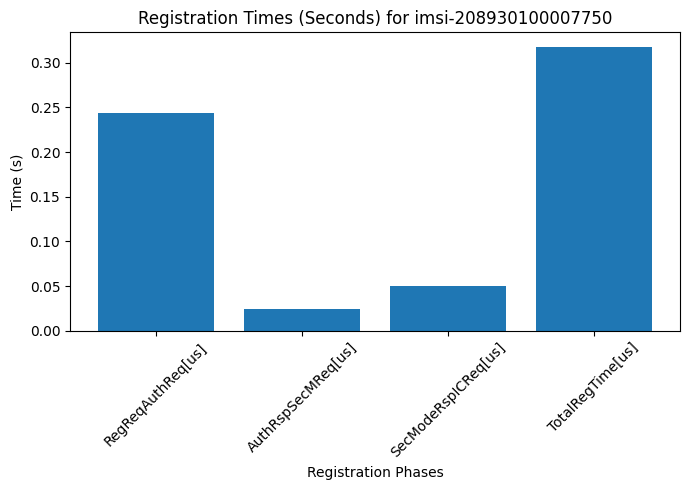

In [ ]:
import matplotlib.pyplot as plt

# Suppose you have a row (Series) named ue_row that contains:
#   "RegReqAuthReq[us]", "AuthRspSecMReq[us]", "SecModeRspICReq[us]", "TotalRegTime[us]"
# We create a dictionary of sub-phase metrics (in microseconds).

times_us = {
    "RegReqAuthReq[us]": ue_row["RegReqAuthReq[us]"],
    "AuthRspSecMReq[us]": ue_row["AuthRspSecMReq[us]"],
    "SecModeRspICReq[us]": ue_row["SecModeRspICReq[us]"],
    "TotalRegTime[us]": ue_row["TotalRegTime[us]"]
}

# 1) Convert microseconds to seconds:
times_s = {phase: val / 1e6 for phase, val in times_us.items()}

# 2) Prepare for plotting
labels = list(times_s.keys())
values = list(times_s.values())

# 3) Plot as a bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, values)
plt.title(f"Registration Times (Seconds) for {ue_row['imsi']}")
plt.xlabel("Registration Phases")
plt.ylabel("Time (s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== SCENARIO: UE Registration ===
A UE attaching to the network for the first time.
6 UE(s) performed this scenario. Showing only one example below.



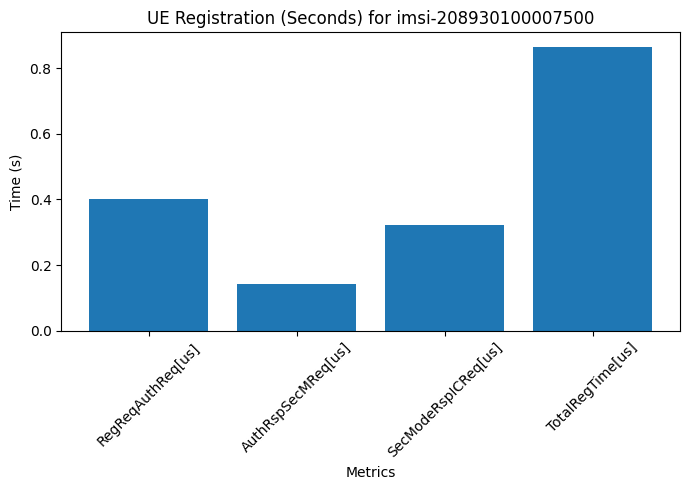


=== SCENARIO: UE-Initiated PDU Session ===
A registered UE initiates a PDU session for data connectivity.
5 UE(s) performed this scenario. Showing only one example below.



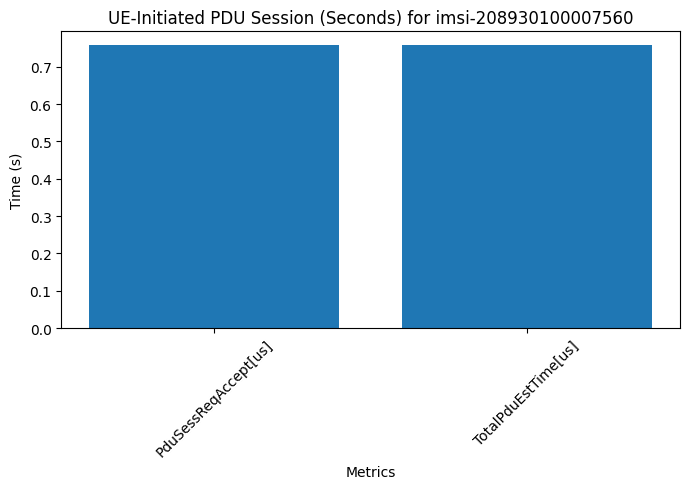


=== SCENARIO: Access Network (AN) Release ===
RAN resource release (Context Release).
2 UE(s) performed this scenario. Showing only one example below.



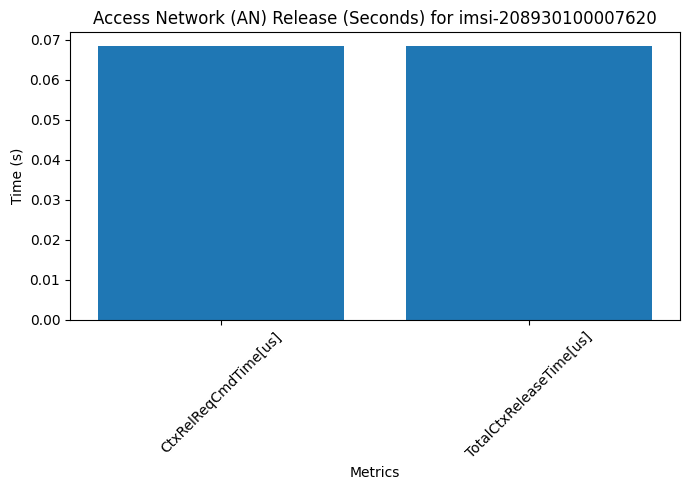


=== SCENARIO: UE-Initiated Service Request ===
UE transitions from idle to active state.
1 UE(s) performed this scenario. Showing only one example below.



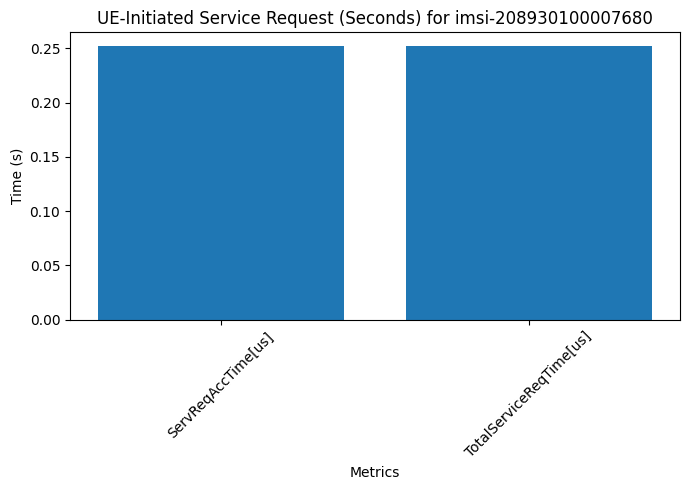


=== SCENARIO: UE-Initiated De-registration ===
UE explicitly disconnecting from the network.
1 UE(s) performed this scenario. Showing only one example below.



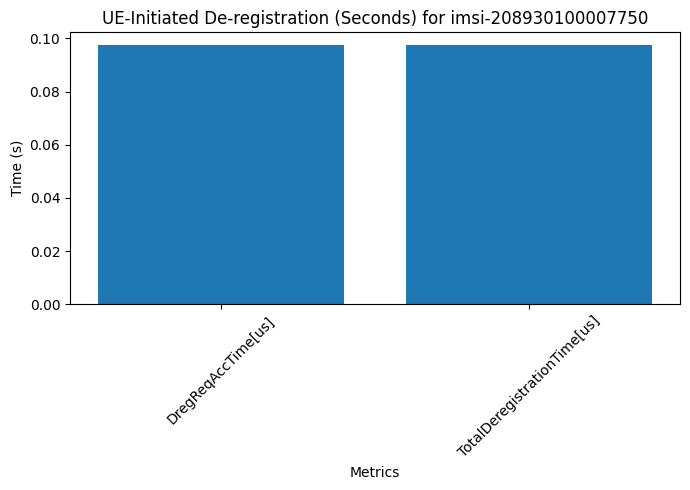


=== Full Aggregated DataFrame (df_combined) ===
+----+----------------------+--------------------+---------------------+----------------------+-----------------------+-----------------------+------------------------+---------------------------+------------------------+---------------------------+----------------------+-------------------------------+----------------------+
|    | imsi                 |   TotalRegTime[us] |   RegReqAuthReq[us] |   AuthRspSecMReq[us] |   SecModeRspICReq[us] |   TotalPduEstTime[us] |   PduSessReqAccept[us] |   TotalCtxReleaseTime[us] |   CtxRelReqCmdTime[us] |   TotalServiceReqTime[us] |   ServReqAccTime[us] |   TotalDeregistrationTime[us] |   DregReqAccTime[us] |
+====+======================+====================+=====================+======================+=======================+=======================+========================+===========================+========================+===========================+======================+=======================

In [ ]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

###############################################################################
# 1) Parse the log file into df_raw
###############################################################################
def parse_log_to_df(log_filename):
    """
    Reads the log file, filters lines with 'Stats' category and 'UE:' prefix,
    extracts key-value metrics, and returns a raw Pandas DataFrame.
    """
    metrics_list = []

    with open(log_filename, 'r') as file:
        for line in file:
            if '"category": "Stats"' in line:
                parts = line.strip().split("\t")
                if len(parts) >= 5:
                    timestamp, level, source, message, json_part = parts[:5]

                    # Attempt to parse JSON metadata
                    try:
                        metadata = json.loads(json_part)
                    except Exception as e:
                        metadata = {}
                        print(f"Error parsing JSON: {e} in line: {line}")

                    if message.startswith("UE:"):
                        message_data = message[3:].strip()
                        fields = [f.strip() for f in message_data.split(",")]
                        imsi = fields[0]

                        metrics = {}
                        for f in fields[1:]:
                            if ":" in f:
                                key, val = f.split(":", 1)
                                metrics[key.strip()] = val.strip()

                        record = {
                            "timestamp": timestamp,
                            "level": level,
                            "source": source,
                            "imsi": imsi
                        }
                        record.update(metrics)
                        record.update(metadata)

                        metrics_list.append(record)

    df_raw = pd.DataFrame(metrics_list)

    # Convert timing columns from string to numeric
    time_cols = [
        'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
        'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
        'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
        'TotalDeregistrationTime[us]', 'DregReqAccTime[us]'
    ]
    for col in time_cols:
        if col in df_raw.columns:
            df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    return df_raw

###############################################################################
# 2) Aggregate so each IMSI appears once in df_combined
###############################################################################
def aggregate_df(df_raw):
    df_combined = df_raw.groupby('imsi', as_index=False).agg({
        'TotalRegTime[us]': 'first',
        'RegReqAuthReq[us]': 'first',
        'AuthRspSecMReq[us]': 'first',
        'SecModeRspICReq[us]': 'first',
        'TotalPduEstTime[us]': 'first',
        'PduSessReqAccept[us]': 'first',
        'TotalCtxReleaseTime[us]': 'first',
        'CtxRelReqCmdTime[us]': 'first',
        'TotalServiceReqTime[us]': 'first',
        'ServReqAccTime[us]': 'first',
        'TotalDeregistrationTime[us]': 'first',
        'DregReqAccTime[us]': 'first'
    })
    return df_combined

###############################################################################
# 3) Main logic - define scenarios & metrics, print matches, plot for single UE
###############################################################################
if __name__ == "__main__":
    # A) Parse and aggregate
    df_raw = parse_log_to_df("gnbsimwith1Ue.log")
    df_combined = aggregate_df(df_raw)

    if df_combined.empty:
        print("No UE data found at all!")
        exit()

    # B) Define scenarios
    #    Each scenario has a 'condition' that checks if the UE performed it
    #    and a 'metrics' list for that scenario's relevant columns.
    scenarios = [
        {
            "name": "UE Registration",
            "description": "A UE attaching to the network for the first time.",
            "condition": lambda row: pd.notnull(row["TotalRegTime[us]"]),
            "metrics": [
                "RegReqAuthReq[us]",
                "AuthRspSecMReq[us]",
                "SecModeRspICReq[us]",
                "TotalRegTime[us]"
            ]
        },
        {
            "name": "UE-Initiated PDU Session",
            "description": "A registered UE initiates a PDU session for data connectivity.",
            "condition": lambda row: pd.notnull(row["TotalPduEstTime[us]"]),
            "metrics": [
                "PduSessReqAccept[us]",
                "TotalPduEstTime[us]"
            ]
        },
        {
            "name": "Access Network (AN) Release",
            "description": "RAN resource release (Context Release).",
            "condition": lambda row: pd.notnull(row["TotalCtxReleaseTime[us]"]),
            "metrics": [
                "CtxRelReqCmdTime[us]",
                "TotalCtxReleaseTime[us]"
            ]
        },
        {
            "name": "UE-Initiated Service Request",
            "description": "UE transitions from idle to active state.",
            "condition": lambda row: pd.notnull(row["TotalServiceReqTime[us]"]),
            "metrics": [
                "ServReqAccTime[us]",
                "TotalServiceReqTime[us]"
            ]
        },
        {
            "name": "UE-Initiated De-registration",
            "description": "UE explicitly disconnecting from the network.",
            "condition": lambda row: pd.notnull(row["TotalDeregistrationTime[us]"]),
            "metrics": [
                "DregReqAccTime[us]",
                "TotalDeregistrationTime[us]"
            ]
        }
    ]

    # C) For each scenario, find matching UEs and plot
    for scenario in scenarios:
        scenario_name = scenario["name"]
        scenario_desc = scenario["description"]
        scenario_condition = scenario["condition"]
        scenario_metrics = scenario["metrics"]

        # 1) Filter UEs that performed this scenario
        matched_df = df_combined[df_combined.apply(scenario_condition, axis=1)]
        num_matched = len(matched_df)

        print(f"=== SCENARIO: {scenario_name} ===")
        print(scenario_desc)
        if num_matched == 0:
            print("No UEs performed this scenario.\n")
            continue

        # 2) Print how many matched, then pick one example UE
        print(f"{num_matched} UE(s) performed this scenario. Showing only one example below.\n")
        ue_example = matched_df.iloc[0]  # single Series

        # 3) Make a dictionary of {metric_name: value_in_seconds}
        times_s = {}
        for m in scenario_metrics:
            val_us = ue_example[m]
            if pd.notnull(val_us):
                times_s[m] = val_us / 1e6  # convert microseconds to seconds
            else:
                # If for some reason the metric is null, skip or set 0
                times_s[m] = 0.0

        # 4) Plot a bar chart
        metric_labels = list(times_s.keys())
        metric_values = list(times_s.values())

        plt.figure(figsize=(7, 5))
        plt.bar(metric_labels, metric_values)
        plt.title(f"{scenario_name} (Seconds) for {ue_example['imsi']}")
        plt.xlabel("Metrics")
        plt.ylabel("Time (s)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print()

    # D) Finally, print the entire df_combined for reference
    print("=== Full Aggregated DataFrame (df_combined) ===")
    print(tabulate(df_combined, headers='keys', tablefmt='grid'))


=== SCENARIO: UE Registration ===
A UE attaching to the network for the first time.
6 UE(s) performed this scenario. Showing only one example below.

Saved plot to UE_Registration_imsi-208930100007500.png (300 dpi)


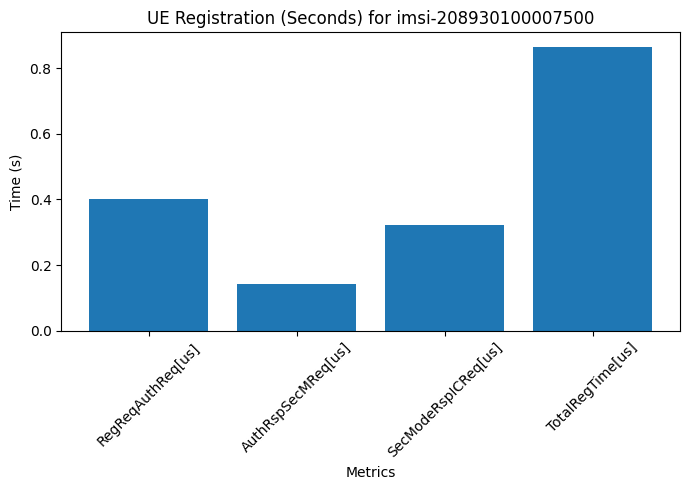


=== SCENARIO: UE-Initiated PDU Session ===
A registered UE initiates a PDU session for data connectivity.
5 UE(s) performed this scenario. Showing only one example below.

Saved plot to UE-Initiated_PDU_Session_imsi-208930100007560.png (300 dpi)


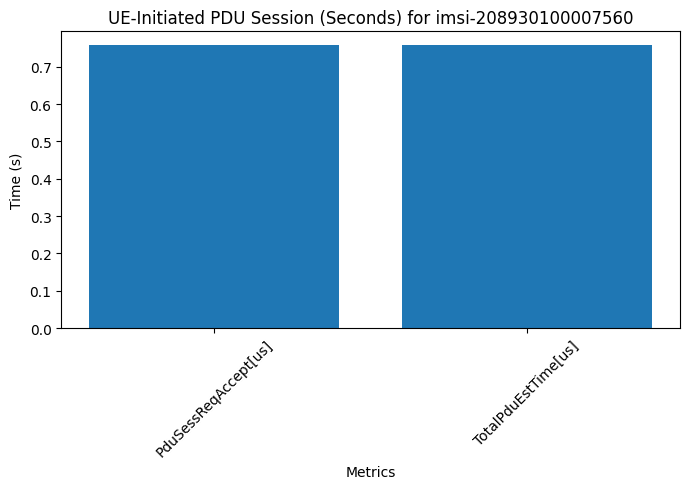


=== SCENARIO: Access Network (AN) Release ===
RAN resource release (Context Release).
2 UE(s) performed this scenario. Showing only one example below.

Saved plot to Access_Network_(AN)_Release_imsi-208930100007620.png (300 dpi)


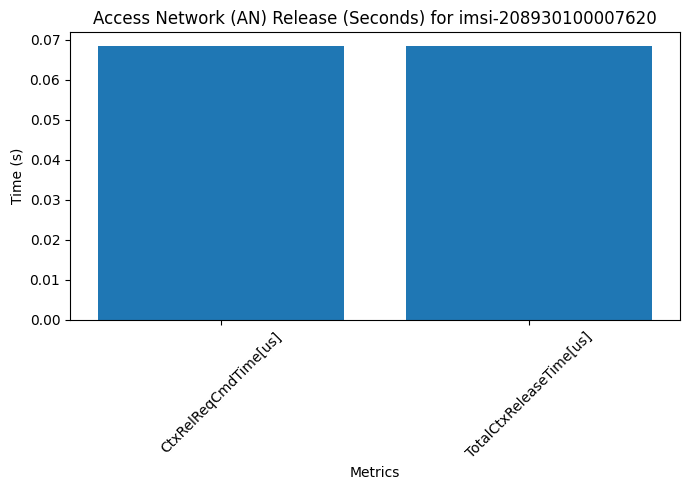


=== SCENARIO: UE-Initiated Service Request ===
UE transitions from idle to active state.
1 UE(s) performed this scenario. Showing only one example below.

Saved plot to UE-Initiated_Service_Request_imsi-208930100007680.png (300 dpi)


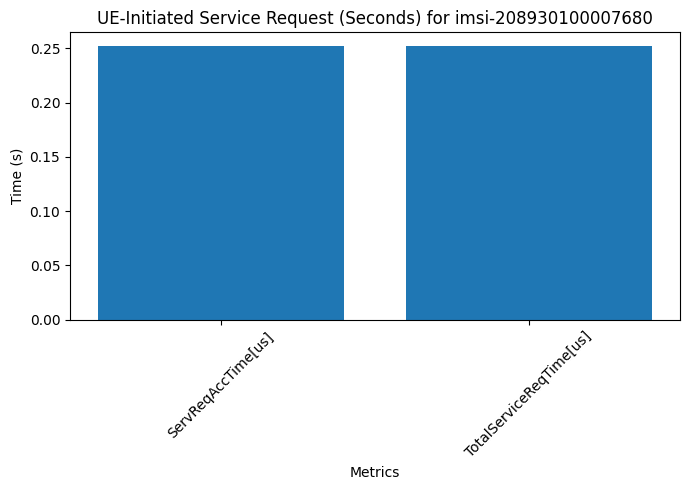


=== SCENARIO: UE-Initiated De-registration ===
UE explicitly disconnecting from the network.
1 UE(s) performed this scenario. Showing only one example below.

Saved plot to UE-Initiated_De-registration_imsi-208930100007750.png (300 dpi)


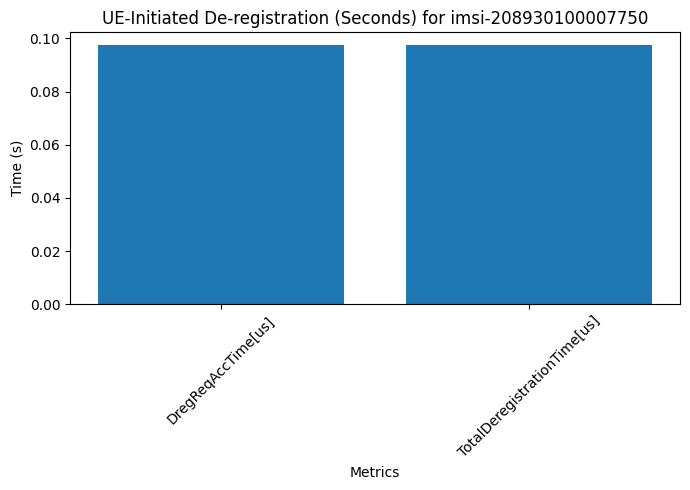


=== Full Aggregated DataFrame (df_combined) ===
+----+----------------------+--------------------+---------------------+----------------------+-----------------------+-----------------------+------------------------+---------------------------+------------------------+---------------------------+----------------------+-------------------------------+----------------------+
|    | imsi                 |   TotalRegTime[us] |   RegReqAuthReq[us] |   AuthRspSecMReq[us] |   SecModeRspICReq[us] |   TotalPduEstTime[us] |   PduSessReqAccept[us] |   TotalCtxReleaseTime[us] |   CtxRelReqCmdTime[us] |   TotalServiceReqTime[us] |   ServReqAccTime[us] |   TotalDeregistrationTime[us] |   DregReqAccTime[us] |
+====+======================+====================+=====================+======================+=======================+=======================+========================+===========================+========================+===========================+======================+=======================

In [ ]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

###############################################################################
# 1) Parse the log file into df_raw
###############################################################################
def parse_log_to_df(log_filename):
    """
    Reads the log file, filters lines with 'Stats' category and 'UE:' prefix,
    extracts key-value metrics, and returns a raw Pandas DataFrame.
    """
    metrics_list = []

    with open(log_filename, 'r') as file:
        for line in file:
            if '"category": "Stats"' in line:
                parts = line.strip().split("\t")
                if len(parts) >= 5:
                    timestamp, level, source, message, json_part = parts[:5]

                    # Attempt to parse JSON metadata
                    try:
                        metadata = json.loads(json_part)
                    except Exception as e:
                        metadata = {}
                        print(f"Error parsing JSON: {e} in line: {line}")

                    if message.startswith("UE:"):
                        message_data = message[3:].strip()
                        fields = [f.strip() for f in message_data.split(",")]
                        imsi = fields[0]

                        metrics = {}
                        for f in fields[1:]:
                            if ":" in f:
                                key, val = f.split(":", 1)
                                metrics[key.strip()] = val.strip()

                        record = {
                            "timestamp": timestamp,
                            "level": level,
                            "source": source,
                            "imsi": imsi
                        }
                        record.update(metrics)
                        record.update(metadata)

                        metrics_list.append(record)

    df_raw = pd.DataFrame(metrics_list)

    # Convert timing columns from string to numeric
    time_cols = [
        'TotalRegTime[us]', 'RegReqAuthReq[us]', 'AuthRspSecMReq[us]',
        'SecModeRspICReq[us]', 'TotalPduEstTime[us]', 'PduSessReqAccept[us]',
        'TotalCtxReleaseTime[us]', 'CtxRelReqCmdTime[us]',
        'TotalServiceReqTime[us]', 'ServReqAccTime[us]',
        'TotalDeregistrationTime[us]', 'DregReqAccTime[us]'
    ]
    for col in time_cols:
        if col in df_raw.columns:
            df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    return df_raw

###############################################################################
# 2) Aggregate so each IMSI appears once in df_combined
###############################################################################
def aggregate_df(df_raw):
    df_combined = df_raw.groupby('imsi', as_index=False).agg({
        'TotalRegTime[us]': 'first',
        'RegReqAuthReq[us]': 'first',
        'AuthRspSecMReq[us]': 'first',
        'SecModeRspICReq[us]': 'first',
        'TotalPduEstTime[us]': 'first',
        'PduSessReqAccept[us]': 'first',
        'TotalCtxReleaseTime[us]': 'first',
        'CtxRelReqCmdTime[us]': 'first',
        'TotalServiceReqTime[us]': 'first',
        'ServReqAccTime[us]': 'first',
        'TotalDeregistrationTime[us]': 'first',
        'DregReqAccTime[us]': 'first'
    })
    return df_combined

###############################################################################
# 3) Main logic - define scenarios & metrics, print matches, plot for single UE
###############################################################################
if __name__ == "__main__":
    # A) Parse and aggregate
    df_raw = parse_log_to_df("gnbsimwith1Ue.log")
    df_combined = aggregate_df(df_raw)

    if df_combined.empty:
        print("No UE data found at all!")
        exit()

    # B) Define scenarios
    #    Each scenario has a 'condition' that checks if the UE performed it
    #    and a 'metrics' list for that scenario's relevant columns.
    scenarios = [
        {
            "name": "UE Registration",
            "description": "A UE attaching to the network for the first time.",
            "condition": lambda row: pd.notnull(row["TotalRegTime[us]"]),
            "metrics": [
                "RegReqAuthReq[us]",
                "AuthRspSecMReq[us]",
                "SecModeRspICReq[us]",
                "TotalRegTime[us]"
            ]
        },
        {
            "name": "UE-Initiated PDU Session",
            "description": "A registered UE initiates a PDU session for data connectivity.",
            "condition": lambda row: pd.notnull(row["TotalPduEstTime[us]"]),
            "metrics": [
                "PduSessReqAccept[us]",
                "TotalPduEstTime[us]"
            ]
        },
        {
            "name": "Access Network (AN) Release",
            "description": "RAN resource release (Context Release).",
            "condition": lambda row: pd.notnull(row["TotalCtxReleaseTime[us]"]),
            "metrics": [
                "CtxRelReqCmdTime[us]",
                "TotalCtxReleaseTime[us]"
            ]
        },
        {
            "name": "UE-Initiated Service Request",
            "description": "UE transitions from idle to active state.",
            "condition": lambda row: pd.notnull(row["TotalServiceReqTime[us]"]),
            "metrics": [
                "ServReqAccTime[us]",
                "TotalServiceReqTime[us]"
            ]
        },
        {
            "name": "UE-Initiated De-registration",
            "description": "UE explicitly disconnecting from the network.",
            "condition": lambda row: pd.notnull(row["TotalDeregistrationTime[us]"]),
            "metrics": [
                "DregReqAccTime[us]",
                "TotalDeregistrationTime[us]"
            ]
        }
    ]

    # C) For each scenario, find matching UEs and plot
    for scenario in scenarios:
        scenario_name = scenario["name"]
        scenario_desc = scenario["description"]
        scenario_condition = scenario["condition"]
        scenario_metrics = scenario["metrics"]

        # 1) Filter UEs that performed this scenario
        matched_df = df_combined[df_combined.apply(scenario_condition, axis=1)]
        num_matched = len(matched_df)

        print(f"=== SCENARIO: {scenario_name} ===")
        print(scenario_desc)
        if num_matched == 0:
            print("No UEs performed this scenario.\n")
            continue

        # 2) Print how many matched, then pick one example UE
        print(f"{num_matched} UE(s) performed this scenario. Showing only one example below.\n")
        ue_example = matched_df.iloc[0]  # single Series

        # 3) Make a dictionary of {metric_name: value_in_seconds}
        times_s = {}
        for m in scenario_metrics:
            val_us = ue_example[m]
            if pd.notnull(val_us):
                times_s[m] = val_us / 1e6  # convert microseconds to seconds
            else:
                # If for some reason the metric is null, skip or set 0
                times_s[m] = 0.0

        # 4) Plot a bar chart
        metric_labels = list(times_s.keys())
        metric_values = list(times_s.values())

        plt.figure(figsize=(7, 5))
        plt.bar(metric_labels, metric_values)
        title_str = f"{scenario_name} (Seconds) for {ue_example['imsi']}"
        plt.title(title_str)
        plt.xlabel("Metrics")
        plt.ylabel("Time (s)")
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Generate an output filename from the scenario name + IMSI
        output_filename = scenario_name.replace(" ", "_") + f"_{ue_example['imsi']}.png"
        # Save at 300 DPI:
        plt.savefig(output_filename, dpi=300)
        print(f"Saved plot to {output_filename} (300 dpi)")

        # Optionally display
        plt.show()

        print()

    # D) Finally, print the entire df_combined for reference
    print("=== Full Aggregated DataFrame (df_combined) ===")
    print(tabulate(df_combined, headers='keys', tablefmt='grid'))
